<a href="https://colab.research.google.com/github/RoshenS/GM2-Pap-ML/blob/main/CNN_Models/GM2_Code_Documentation_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

The aim of this documentation report is to act as a guide to EyeVu's software team in understanding and incorporating the code written by our team into EyeVu's existing pipeline, replicate the results, and modify it as necessary to cater to EyeVu's evolving needs.

The report breaks down every segment of the code, from data preparation and augmentation to model creation, training, and validation. It explains the logic and rationale behind each method used, the various parameters and configurations chosen, and the ways to adjust these parameters for different scenarios. Through this thorough walk-through of the code, the team should be able to leverage the model's capabilities to effectively diagnose Papilledema from online datasets.

The first part of this report is authored by Christos Antonopoulos and the second by Blendi Bylygbashi. 

# Import Libraries

This block of code is responsible for setting up the environment for the machine learning task. It starts by importing the necessary libraries for data manipulation, operating system interaction, numerical computations, image processing, and data visualization. Then, it sets the TensorFlow's logging level to display only error messages, which could help reduce unnecessary log outputs during debugging.

It also sets the data visualization style for Seaborn, a graphical library built on top of Matplotlib. Seaborn's style is set to 'darkgrid', which means all plots will have a dark background with grid lines.



In [ ]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #info and warning messages are not printed. Only error messages printed. Disables all logging output from TensorFlow.
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Mount Google Drive

After importing machine learning libraries from TensorFlow and sklearn, the code mounts Google Drive to the Google Colaboratory platform. This is done to access the data stored in the Google Drive. The content of different directories in the Drive is printed to get a list of the files. These directories contain images of the conditions 'Normal', 'Papilledema', and 'Pseudopapilledema', which are to be classified by the machine learning model.

The whole set of images can be found at the Papilledema_Data_2 folder in github.Then, the operator needs to upload this file in the corresponding company's goodle drive.

In [ ]:
from google.colab import drive # Mount the Google Drive file to Colab
drive.mount('/content/drive')

Mounted at /content/drive


**Papilledema_Data_2 is the new larger dataset that includes both the original and recently acquired new dataset**

The purpose of the next four lines of code is simply to ensure that the contents of the file are as expected.

In [ ]:
print(os.listdir('/content/drive/MyDrive/Papilledema_Data_2')) # Print the different labels (prints list of files in directory)

['Papilledema', 'Normal', 'Pseudopapilledema']


In [ ]:
print(os.listdir('/content/drive/MyDrive/Papilledema_Data_2/Normal'))


['209.jpg', '285 (1).jpg', '288.jpg', '166.jpg', '12.jpg', '261.jpg', '225.jpg', '296.jpg', '217.jpg', '260.jpg', '15.jpg', '21.jpg', '206.jpg', '13.jpg', '291 (1).jpg', '19.jpg', '24.jpg', '302.jpg', '145.jpg', '108.jpg', '246 (1).jpg', '172.jpg', '156.jpg', '245.jpg', '238.jpg', '196.jpg', '280.jpg', '154 (1).jpg', '290.jpg', '23.jpg', '20.jpg', '2.jpg', '197.jpg', '277.jpg', '297.jpg', '229.jpg', '131.jpg', '107.jpg', '234.jpg', '246.jpg', '177.jpg', '274.jpg', '240.jpg', '17.jpg', '199.jpg', '221.jpg', '155.jpg', '168.jpg', '188.jpg', '293.jpg', '252 (1).jpg', '135.jpg', '169.jpg', '292.jpg', '247.jpg', '140 (1).jpg', '263.jpg', '185.jpg', '118.jpg', '26.jpg', '114.jpg', '267.jpg', '204.jpg', '262.jpg', '180.jpg', '195.jpg', '257.jpg', '104.jpg', '299.jpg', '159.jpg', '158.jpg', '146.jpg', '253.jpg', '259.jpg', '233.jpg', '224.jpg', '273.jpg', '162.jpg', '152.jpg', '22.jpg', '125.jpg', '285.jpg', '194.jpg', '179.jpg', '173.jpg', '183.jpg', '147.jpg', '27.jpg', '226.jpg', '174.jpg',

In [ ]:
print(os.listdir('/content/drive/MyDrive/Papilledema_Data_2/Papilledema'))


['175.jpg', '62.jpg', '74.jpg', '60.jpg', 'Αντίγραφο του Bilateral_Papilledema_from_Pseudotumor (1)(1).jpg', 'Αντίγραφο του Bilateral_Papilledema (3).jpg', '76.jpg', '163.jpg', '188.jpg', '89.jpg', '177.jpg', '229.jpg', '215.jpg', '201.jpg', 'Αντίγραφο του Papilledema_due_to_brain_tumor_natural_history (9).jpg', 'Αντίγραφο του Post_papilledema_disc_blurring (1).jpg', 'Αντίγραφο του Bilateral_Papilledema_in_Pseudotumor.jpg', '214.jpg', '200.jpg', 'Αντίγραφο του Unilateral_Papilledema (17).jpg', '228.jpg', '176.jpg', '77.jpg', '162.jpg', '88.jpg', 'Αντίγραφο του Progression_of_papilledema_due_to_metastatic_melanoma.jpg', 'Αντίγραφο του Unilateral_Papilledema (2).jpg', 'Αντίγραφο του Chronic_papilledema_due_to_brain_tumor.jpg', '189.jpg', 'Αντίγραφο του Post_papilledema_disc_blurring.jpg', '63.jpg', '48.jpg', '149.jpg', '277.jpg', '288.jpg', '115.jpg', '101.jpg', '28.jpg', '14.jpg', '67.jpg', '9.jpg', '129.jpg', 'Αντίγραφο του Unilateral_Papilledema (8).jpg', '73.jpg', '199.jpg', 'Αντίγρα

In [ ]:
print(os.listdir('/content/drive/MyDrive/Papilledema_Data_2/Pseudopapilledema'))

['201.jpg', '162.jpg', '214.jpg', '77.jpg', '228.jpg', '176.jpg', '200.jpg', '88.jpg', 'Αντίγραφο του Visible_drusen_with_visual_field_loss.jpg', 'Αντίγραφο του Visible_drusen.jpg', 'Αντίγραφο του Buried_drusen (3).jpg', '63.jpg', '189.jpg', '67.jpg', '14.jpg', '9.jpg', '28.jpg', 'Αντίγραφο του Buried_drusen (2).jpg', '98.jpg', '166.jpg', '73.jpg', '199.jpg', '172.jpg', '238.jpg', '210.jpg', '239.jpg', '204.jpg', 'Αντίγραφο του Buried_and_visible_drusen.jpg', 'Αντίγραφο του Crowded_disc_Family.jpg', '205.jpg', '173.jpg', '211.jpg', '99.jpg', '66.jpg', '72.jpg', '167.jpg', '171.jpg', '64.jpg', '198.jpg', '58.jpg', '8.jpg', '70.jpg', '165.jpg', '213.jpg', '207.jpg', '212.jpg', '159.jpg', 'Αντίγραφο του Crowded_disc (2).jpg', '158.jpg', '164.jpg', '206.jpg', 'Αντίγραφο του Bilateral_crowded_discs_Family.jpg', '170.jpg', '75.jpg', '65.jpg', '148.jpg', '59.jpg', '160.jpg', '49.jpg', '61.jpg', '71.jpg', '174.jpg', 'Αντίγραφο του PP5b_Crowded_Disc.jpg', '203.jpg', '202.jpg', '175.jpg', '161.j

# Class Images in Dataset

This part of the code focuses on preparing the dataset for training, validation, and testing purposes. The primary task includes reading the images, sorting them according to their classes, and splitting the dataset into training, validation, and testing sets. The script also extracts relevant information about the dataset, such as class distribution and the average dimensions of the images.

The code starts by defining the directory where the data is stored. It then initializes two lists to store the file paths and corresponding labels. The script then loops through each subdirectory in the main directory (which are representative of the classes or labels) and appends the file paths and labels to the respective lists.

These lists are then converted into pandas Series and concatenated into a DataFrame, where each row corresponds to an image and includes the file path and the label of the image.

The script then splits this DataFrame into training, validation, and test sets, using the train_test_split function from the sklearn.model_selection module. This is done in a stratified manner, ensuring that the distribution of labels in each set is similar to the distribution in the original dataset.

The lengths of the training, validation, and test sets are printed, followed by the number of unique classes in the dataset. The class-wise distribution of images in the training set is also printed.

The script identifies the classes with the most and least number of images in the training set and calculates the average height and width of a random sample of training images. The average height, width, and aspect ratio are then printed.

This process is important as it sets up the data for the training phase. Additionally, by examining the distribution of labels and the dimensions of the images, the script helps understand potential challenges that might arise during the training phase, such as imbalanced data or variance in image dimensions.

In [ ]:
# define the directory where the data is stored
sdir = r'/content/drive/MyDrive/Papilledema_Data_2'

# Initialize lists for storing filepaths and labels
filepaths = []
labels = [] 

# Get a sorted list of all subdirectories in the main directory
classlist = sorted(os.listdir(sdir))  

# Iterate over each subdirectory and append its filepaths and labels to respective lists
for klass in classlist:
    classpath = os.path.join(sdir, klass)
    for f in os.listdir(classpath):        
        filepaths.append(os.path.join(classpath, f))
        labels.append(klass)

# Convert the lists into pandas Series
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Concatenate the series into a dataframe
df = pd.concat([Fseries, Lseries], axis=1)

# Split the dataframe into training, validation, and testing sets
train_df, dummy_df = train_test_split(df, train_size=.8, shuffle=True, random_state=123, stratify=df['labels'])
valid_df, test_df = train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels'])

print(f'Train set length: {len(train_df)}, Test set length: {len(test_df)}, Validation set length: {len(valid_df)}')

# Get the number of unique classes and their counts
class_count = train_df['labels'].nunique()
print(f'The number of classes in the dataset is: {class_count}')

# Group the dataframe by labels and get their counts
class_counts = train_df['labels'].value_counts()

# Display the class-wise image counts
print('CLASS:\t\tIMAGE COUNT:')
for idx, val in class_counts.iteritems():
    print(f'{idx}:\t{val}')

# Get the classes with minimum and maximum number of images
min_class = class_counts.idxmin()
max_class = class_counts.idxmax()
print(f'{max_class} has the most images={class_counts[max_class]}, {min_class} has the least images={class_counts[min_class]}')

# Compute the average height and width of a random sample of training images
heights, widths = [], []
train_df_sample = train_df.sample(n=100, random_state=123)

for filepath in train_df_sample['filepaths']:
    img = plt.imread(filepath)
    heights.append(img.shape[0])
    widths.append(img.shape[1])

avg_height = sum(heights) / len(heights)
avg_width = sum(widths) / len(widths)

print(f'Average height= {avg_height}, Average width= {avg_width}, Aspect ratio= {avg_height / avg_width}')


Train set length: 1228, Test set length: 154, Validation set length: 153
The number of classes in the dataset is: 3
CLASS:		IMAGE COUNT:
Normal:	641
Papilledema:	318
Pseudopapilledema:	269
Normal has the most images=641, Pseudopapilledema has the least images=269


<ipython-input-5-1be16e77d3f1>:40: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, val in class_counts.iteritems():


Average height= 256.46, Average width= 262.41, Aspect ratio= 0.977325559239358


#Set Maximum & Minimum Samples Per Class

This portion of the code defines a function named trim, which is used to handle the potential issue of class imbalance in the training dataset. The function takes as input a DataFrame, maximum and minimum samples per class, and a column name which specifies the label or class. The goal of this function is to ensure that each class in the dataset has a number of samples within the specified range, in order to prevent bias towards any particular class during model training.

The function starts by copying the input DataFrame to avoid in-place modifications. An empty DataFrame with the same columns as the input DataFrame is then initialized. The input DataFrame is grouped by the specified column (which represents the labels in this case).

The function then iterates over each unique value (label) in the specified column. If the number of samples for a particular label exceeds the specified maximum, the function randomly samples a number of instances equal to the maximum from this group. If the number of samples is less than the maximum but more than or equal to the minimum, the function keeps all samples. If the number of samples is less than the minimum, this group is not included in the trimmed dataset.

Finally, the function trim is called with the training DataFrame, maximum samples, minimum samples, and column name as inputs. The output, which is the trimmed training DataFrame, is stored back into train_df.

This process is important for handling class imbalance in the dataset, which could lead to biased results. The trim function ensures that each class in the training dataset has a similar number of samples, which should lead to a more fair representation of each class during model training. 

**Note:** This code block can be skipped entirely; the imbalances in the classes is likely not high enough to cause bias in results

In [ ]:
def trim(df, max_samples, min_samples, column):
    # Copy the dataframe to avoid inplace modifications
    df = df.copy()
    
    # Initialize an empty dataframe with the same columns as the input dataframe
    trimmed_df = pd.DataFrame(columns=df.columns)
    
    # Group the dataframe by the specified column
    groups = df.groupby(column)

    # Iterate over each unique value in the specified column
    for label in df[column].unique(): 
        group = groups.get_group(label)
        count = len(group)    

        # If count exceeds max_samples, randomly sample max_samples from the group
        if count > max_samples:
            sampled_group = group.sample(n=max_samples, random_state=123)
            trimmed_df = pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            # If count is greater than or equal to min_samples, keep the entire group
            if count >= min_samples:
                trimmed_df = pd.concat([trimmed_df, group], axis=0)

    print(f'After trimming, the maximum samples in any class is now {max_samples} and the minimum samples in any class is {min_samples}')

    return trimmed_df

# Set the maximum and minimum samples per class
max_samples = 236
min_samples = 226
column = 'labels'

# Trim the training dataframe to the specified number of samples per class
train_df = trim(train_df, max_samples, min_samples, column)


After trimming, the maximum samples in any class is now 236 and the minimum samples in any class is 226


**Define the Gaussian Colour Subtraction Function**

The function 'gaussian_color_subtraction', is used to process an image by applying a Gaussian blur and then subtracting the blurred image from the original image. This function is used to process the images before feeding them into the machine learning model. By highlighting the important features in the images, the function improves the model's ability to distinguish between different classes (normal, papilledema, pseudopapilledema).

The function takes an input image and first ensures that the image data type is float for accurate subtraction and division operations. Then, it computes the Gaussian blur of the image using OpenCV's 'cv2.GaussianBlur' function, with a standard deviation (sigmaX) of 30. The size of the kernel is set to (0,0) which means that it will be computed from the standard deviation.

Next, the function subtracts the blurred image from the original image using cv2.subtract. This operation can help to emphasize the edges and contours in the image.

After the subtraction, the pixel values of the image might fall outside the valid range [0, 255]. Therefore, the function applies a clipping operation to ensure that all pixel values are within this range. Finally, the function converts the image back to the uint8 data type and returns it.



In [ ]:
import cv2
import numpy as np

def gaussian_color_subtraction(image):
    # Ensure the image data type is float for accurate subtraction and division operations
    image = image.astype(float)

    # Compute the Gaussian blur of the image
    blurred = cv2.GaussianBlur(image, (0, 0), sigmaX=30)
    
    # Subtract the blurred image from the original image
    subtracted = cv2.subtract(image, blurred)

    # Clip the pixel values to the valid range [0, 255]
    subtracted = np.clip(subtracted, 0, 255)

    # Return the image after converting back to uint8
    return subtracted.astype(np.uint8)



**Define the Grayscaling function**

The function 'grayscale_conversion' is used to process an image by converting it into a grayscale version. This function is used to preprocess the images before feeding them into the machine learning model. By simplifying the color scheme of the images, the function allows the model to focus more on the shape and texture features in the images, which could potentially enhance the model's ability to distinguish between different classes (normal, papilledema, pseudopapilledema).

The function takes an input image and first ensures that the image data type is uint8, the standard datatype for images that OpenCV functions can operate on, to ensure accurate color conversion.

Next, it converts the image to grayscale using OpenCV's 'cv2.cvtColor' function with the conversion code 'cv2.COLOR_BGR2GRAY'. This conversion reduces the image from a 3-channel color image (Blue, Green, Red) to a 1-channel grayscale image, by removing the color information while retaining the brightness levels of the pixels.

After this conversion, the function stacks the grayscale image three times along the color channel axis, using numpy's 'np.stack' function, to create a 3-channel grayscale image. This is done to match the input requirements of models that expect 3-channel input images.

The pixel values of the image are then clipped to the valid range [0, 255] to ensure that all pixel values are within this range.

Finally, the function converts the image back to the uint8 data type before returning it. This conversion ensures compatibility with other OpenCV functions or image display tools that might be used on the processed image later.


In [ ]:
def grayscale_conversion(image):
    # Ensure the image data type is uint8 for accurate conversion
    image = image.astype(np.uint8)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Stack the grayscale image 3 times to create a 3-channel image
    stacked_gray = np.stack((gray,)*3, axis=-1)
    
    # Clip the pixel values to the valid range [0, 255]
    stacked_gray = np.clip(stacked_gray, 0, 255)

    # Return the image after converting back to uint8
    return stacked_gray.astype(np.uint8)


#Preprocess the Images

This segment of code sets up image data generators for training, validation, and testing datasets. These generators are useful for efficiently loading and preprocessing images in real-time during model training and evaluation.

Initially, the directory where the script is running is defined, along with the desired image size and batch size for model input. For the training dataset, an ImageDataGenerator is initialized with various image augmentation techniques such as horizontal flipping, rotation, shifting the width and height, zooming, along with a preprocessing function such as gaussian_color_subtraction defined earlier. These augmentations increase the diversity of the training data and help the model generalize better.

For validation and testing datasets, another ImageDataGenerator is initialized without the augmentation but still applying the gaussian_color_subtraction preprocessing function. This is because these datasets are used for model evaluation and should represent the actual data distribution.

Next, the flow_from_dataframe function of the ImageDataGenerator class is used to generate batches of augmented/normalized images directly from the dataframes train_df, valid_df, and test_df, that were prepared earlier.

The test batch size is calculated in such a way that each sample in the test set is used exactly once, with the maximum batch size limited to 80.

Lastly, some useful information is extracted from the train generator, such as the class names, class indices, and total number of classes. This information is crucial for interpreting the model's predictions later on.

Finally, the code prints out the calculated batch size for testing, the number of steps for the testing phase (which is the total number of test samples divided by the batch size), and the total number of classes.

This process is vital in feeding the data to the machine learning model during training, validation, and testing stages. It not only efficiently manages memory usage but also makes sure that the data is appropriately augmented and preprocessed for the model.

**Note**: There are three code blocks following this. The first uses the basic augmentation techniques and Gaussian colour subtraction, the second uses the basic techniques and grayscaling, and the third uses only the basic techniques. Whichever one of these is run last is the one that will be used in the preprocessing.

**Preprocessing with Gaussian colour subtraction**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory where the script is running
working_dir = r'./' 

# Define the desired size of the images for model input
img_size = (240, 240)

# Define the batch size for training, suitable for EfficientetB3 model
batch_size = 30

# Initialize an ImageDataGenerator for augmenting training images with gaussian color subtraction
trgen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=.2, height_shift_range=.2, zoom_range=.2, preprocessing_function=gaussian_color_subtraction)

# Initialize another ImageDataGenerator for validation and testing (without augmentation but with gaussian color subtraction)
t_and_v_gen = ImageDataGenerator(preprocessing_function=gaussian_color_subtraction)

# Print a placeholder message for train generator loading
print('{0:70s} for train generator'.format(' '), '\r', end='')

# Generate augmented images for training from the train_df DataFrame
train_gen = trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)

# Print a placeholder message for validation generator loading
print('{0:70s} for valid generator'.format(' '), '\r', end='')

# Generate images for validation from the valid_df DataFrame
valid_gen = t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)

# Calculate batch size for test set such that each sample in the test set is used exactly once
length = len(test_df)
test_batch_size = sorted([int(length/n) for n in range(1, length+1) if length % n == 0 and length/n <= 80], reverse=True)[0]  
test_steps = int(length/test_batch_size)

# Print a placeholder message for test generator loading
print('{0:70s} for test generator'.format(' '), '\r', end='')

# Generate images for testing from the test_df DataFrame
test_gen = t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)

# Extract some useful information from the train generator
classes = list(train_gen.class_indices.keys())
class_indices = list(train_gen.class_indices.values())
class_count = len(classes)
labels = test_gen.labels

print(f'Test batch size: {test_batch_size}, Test steps: {test_steps}, Number of classes: {class_count}')


Found 708 validated image filenames belonging to 3 classes.
Found 153 validated image filenames belonging to 3 classes.
Found 154 validated image filenames belonging to 3 classes.
Test batch size: 77, Test steps: 2, Number of classes: 3


**Preprocessing with Grayscaling**

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the directory where the script is running
working_dir = r'./' 

# Define the desired size of the images for model input
img_size = (240, 240)

# Define the batch size for training, suitable for EfficientetB3 model
batch_size = 30

# Initialize an ImageDataGenerator for augmenting training images with grayscale conversion
trgen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=.2, height_shift_range=.2, zoom_range=.2, preprocessing_function=grayscale_conversion)

# Initialize another ImageDataGenerator for validation and testing (without augmentation but with grayscale conversion)
t_and_v_gen = ImageDataGenerator(preprocessing_function=grayscale_conversion)

# Print a placeholder message for train generator loading
print('{0:70s} for train generator'.format(' '), '\r', end='')

# Generate augmented images for training from the train_df DataFrame
train_gen = trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)

# Print a placeholder message for validation generator loading
print('{0:70s} for valid generator'.format(' '), '\r', end='')

# Generate images for validation from the valid_df DataFrame
valid_gen = t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)

# Calculate batch size for test set such that each sample in the test set is used exactly once
length = len(test_df)
test_batch_size = sorted([int(length/n) for n in range(1, length+1) if length % n == 0 and length/n <= 80], reverse=True)[0]  
test_steps = int(length/test_batch_size)

# Print a placeholder message for test generator loading
print('{0:70s} for test generator'.format(' '), '\r', end='')

# Generate images for testing from the test_df DataFrame
test_gen = t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)

# Extract some useful information from the train generator
classes = list(train_gen.class_indices.keys())
class_indices = list(train_gen.class_indices.values())
class_count = len(classes)
labels = test_gen.labels

print(f'Test batch size: {test_batch_size}, Test steps: {test_steps}, Number of classes: {class_count}')


Found 708 validated image filenames belonging to 3 classes.
Found 153 validated image filenames belonging to 3 classes.
Found 154 validated image filenames belonging to 3 classes.
Test batch size: 77, Test steps: 2, Number of classes: 3


**Preprocessing with only the 5 basic augmentations (no Gaussian colour subtraction or grayscaling)**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory where the script is running
working_dir = r'./' 

# Define the desired size of the images for model input
img_size = (240, 240)

# Define the batch size for training, suitable for EfficientetB3 model
batch_size = 30

# Initialize an ImageDataGenerator for augmenting training images
trgen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=.2, height_shift_range=.2, zoom_range=.2)

# Initialize another ImageDataGenerator for validation and testing (without augmentation)
t_and_v_gen = ImageDataGenerator()

# Print a placeholder message for train generator loading
print('{0:70s} for train generator'.format(' '), '\r', end='')

# Generate augmented images for training from the train_df DataFrame
train_gen = trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)

# Print a placeholder message for validation generator loading
print('{0:70s} for valid generator'.format(' '), '\r', end='')

# Generate images for validation from the valid_df DataFrame
valid_gen = t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)

# Calculate batch size for test set such that each sample in the test set is used exactly once
length = len(test_df)
test_batch_size = sorted([int(length/n) for n in range(1, length+1) if length % n == 0 and length/n <= 80], reverse=True)[0]  
test_steps = int(length/test_batch_size)

# Print a placeholder message for test generator loading
print('{0:70s} for test generator'.format(' '), '\r', end='')

# Generate images for testing from the test_df DataFrame
test_gen = t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)

# Extract some useful information from the train generator
classes = list(train_gen.class_indices.keys())
class_indices = list(train_gen.class_indices.values())
class_count = len(classes)
labels = test_gen.labels

print(f'Test batch size: {test_batch_size}, Test steps: {test_steps}, Number of classes: {class_count}')


Found 708 validated image filenames belonging to 3 classes.
Found 153 validated image filenames belonging to 3 classes.
Found 154 validated image filenames belonging to 3 classes.
Test batch size: 77, Test steps: 2, Number of classes: 3


**Display some images**

The show_image_samples function is a utility function that is used to display a batch of image samples along with their respective labels from a generator, like ImageDataGenerator. This function is particularly helpful for visually inspecting the images and their corresponding labels, checking whether the preprocessing and augmentation operations have been performed as expected, and ensuring that the data is correctly labeled.



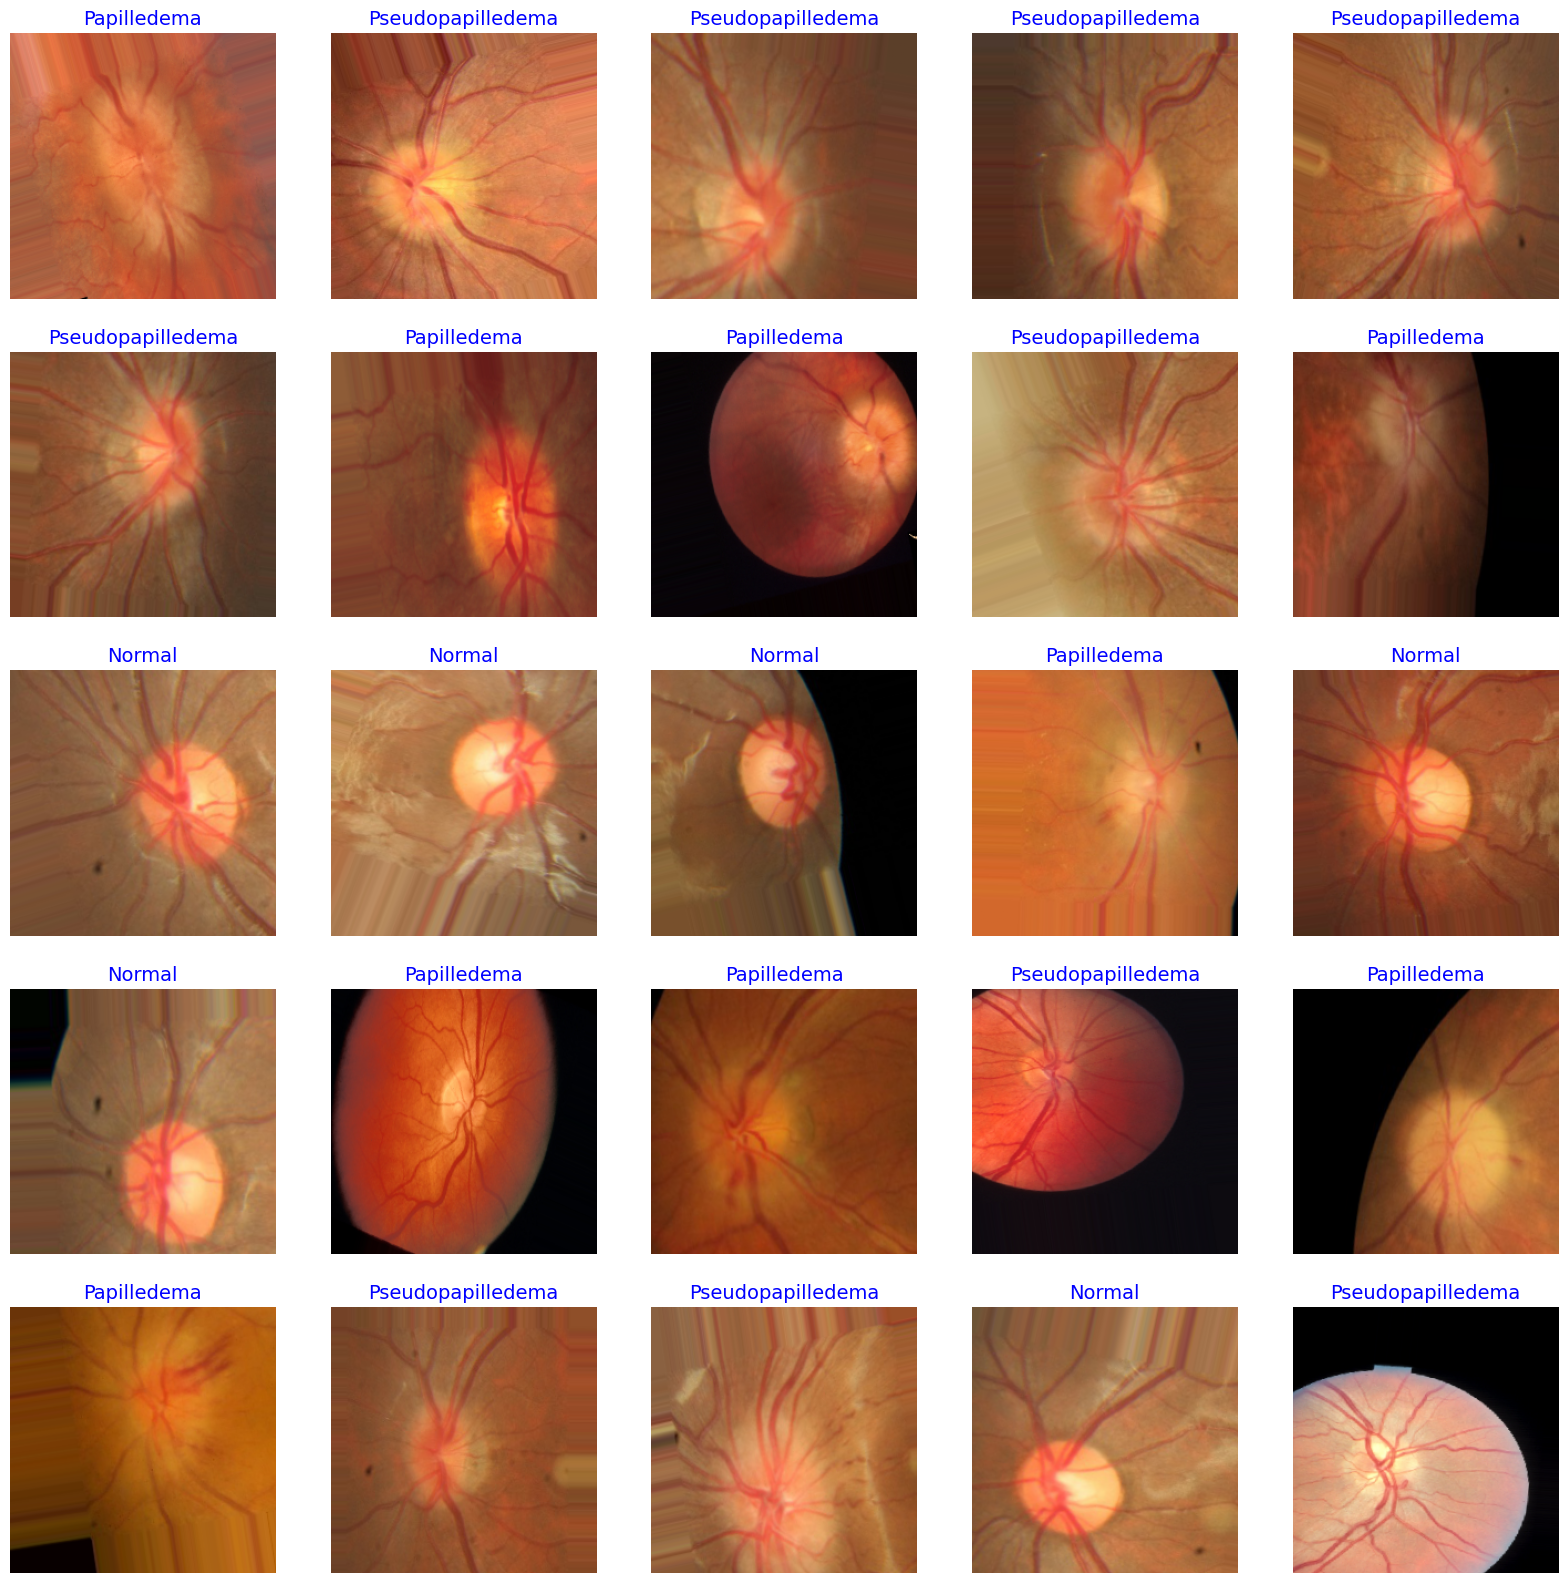

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def show_image_samples(gen):
    """
    Displays a batch of image samples and their labels.

    Parameters:
        gen (Generator): An ImageDataGenerator object.
    """
    # Get class labels
    t_dict = gen.class_indices
    classes = list(t_dict.keys())

    # Get a batch of images and labels
    images, labels = next(gen)

    # Define the size of the plot
    plt.figure(figsize=(20, 20))

    # Determine the number of images to display (max 25)
    length = len(labels)
    num_images = min(length, 25)  # Show a maximum of 25 images

    # Plot each image with its class label
    for i in range(num_images):  
        plt.subplot(5, 5, i + 1)  # Create a 5x5 grid of subplots

        # Normalize image pixel values to [0, 1] for correct display
        image = images[i] / 255

        # Display the image
        plt.imshow(image)

        # Get the class label for the image
        index = np.argmax(labels[i])
        class_name = classes[index]

        # Display the class label
        plt.title(class_name, color='blue', fontsize=14)

        # Hide axes for clarity
        plt.axis('off')

    # Display the plot with image samples
    plt.show()

# Show image samples from the training generator
show_image_samples(train_gen)

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Set Up CNN Model (EfficientNetB3)

The next block of code is responsible for the definition and compilation of the convolutional neural network (CNN) model used in this project. Here, an EfficientNetB3 model pretrained on the ImageNet dataset is utilized as a base model. Additional custom layers are then added on top of this base model to tailor the network to the task at hand - papilledema classification.

To begin, the base model is initialized using tf.keras.applications.EfficientNetB3. include_top=False indicates that the last fully connected layer, typically used for classification, is not included as it would be tailored to the ImageNet classes. weights="imagenet" means that the weights from the ImageNet pre-training are used. The input_shape parameter is set to the shape of the input images, and pooling='max' indicates that max pooling is applied after the last convolutional layer of the base model.

Next, base_model.trainable = True is used to make all layers in the base model trainable, meaning their weights will be updated during training.

Then, several custom layers are added on top of the base model. First, a BatchNormalization layer is applied, followed by a densely connected (Dense) layer with 256 neurons, a ReLU activation function, and L1 and L2 regularization applied to the weights and biases. A Dropout layer is then added to introduce regularization and reduce overfitting. Finally, the output layer, a Dense layer with a softmax activation function, is added. The number of neurons in this layer matches the number of classes in the problem.

The model is then compiled using the Adamax optimizer, categorical cross entropy as the loss function, and accuracy as a performance metric.

If a different CNN is to be used, the operator would need to replace tf.keras.applications.EfficientNetB3 with the desired model, for instance, tf.keras.applications.ResNet50 for a ResNet-50 model. The operator would also need to check if the pretrained model accepts the desired image size and adjust img_size accordingly.  



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model


    # EfficientNetB3


# Define the size of your input images
img_size = (224, 224)
img_shape = (img_size[0], img_size[1], 3)

# Create the base pre-trained model using EfficientNetB3
base_model = tf.keras.applications.EfficientNetB3(
    include_top=False,  # Do not include the top (last) fully connected layer
    weights="imagenet",  # Use pre-trained weights from ImageNet
    input_shape=img_shape,  # Define the input shape
    pooling='max'  # Use max pooling for the output of the last convolutional layer
)

# Make all layers in the base model trainable
base_model.trainable = True

# Add custom layers on top of the base model
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)  # Add a batch normalization layer
x = Dense(256, 
          kernel_regularizer=regularizers.l2(l=0.016),  # Apply L2 regularization to the weights
          activity_regularizer=regularizers.l1(0.006),  # Apply L1 regularization to the activation
          bias_regularizer=regularizers.l1(0.006),  # Apply L1 regularization to the biases
          activation='relu')(x)  # Add a dense layer with ReLU activation function
x = Dropout(rate=.4, seed=123)(x)  # Add a dropout layer for regularization
output = Dense(class_count, activation='softmax')(x)  # Add the output layer with softmax activation function

# Combine the base model with the custom layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with an optimizer, loss function, and performance metric
model.compile(
    optimizer=Adamax(learning_rate=0.001),  # Use the Adamax optimizer
    loss='categorical_crossentropy',  # Use categorical cross entropy as the loss function
    metrics=['accuracy']  # Track accuracy during the training
)


43941136/43941136 [==============================] - 3s 0us/step


In [ ]:
# Define the shape of your input images
img_shape=(img_size[0], img_size[1], 3)


     # EfficientNetB3



# Name your model
model_name='EfficientNetB3'

# Create the base pre-trained model EfficientNetB3
base_model=tf.keras.applications.EfficientNetB3(
    include_top=False,  # Exclude the top (last) fully connected layer
    weights="imagenet",  # Use pre-trained weights from ImageNet
    input_shape=img_shape,  # Define the input shape
    pooling='max'  # Apply max pooling to the output of the last convolutional layer
) 

# Make all layers in the base model trainable
base_model.trainable=True

# Add custom layers on top of the base model
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)  # Add a BatchNormalization layer
x = Dense(256, 
          kernel_regularizer=regularizers.l2(l=0.016),  # Apply L2 regularization to the weights
          activity_regularizer=regularizers.l1(0.006),  # Apply L1 regularization to the activation
          bias_regularizer=regularizers.l1(0.006),  # Apply L1 regularization to the biases
          activation='relu')(x)  # Add a Dense layer with ReLU activation
x = Dropout(rate=.4, seed=123)(x)  # Add a Dropout layer for regularization

# Add the output layer with softmax activation function
output = Dense(class_count, activation='softmax')(x)

# Combine the base model with the custom layers
model = Model(inputs=base_model.input, outputs=output)

# Set the learning rate
lr=.001 

# Compile the model with an optimizer, loss function, and performance metric
model.compile(
    optimizer=Adamax(learning_rate=lr),  # Use the Adamax optimizer
    loss='categorical_crossentropy',  # Use categorical cross entropy as the loss function
    metrics=['accuracy']  # Track accuracy during the training
)


**Custom Keras Callback**


The LrAsk class is a custom callback in Keras that gives the operator control over the training process. A callback is a set of functions to be applied at given stages of the training process, providing a way to customize the behavior of a Keras model during training. In this case, the user can choose to halt the training process or continue it for additional epochs, and adjust the learning rate on the fly.

The callback is initialized with a reference to the model, the total number of epochs, and the epoch at which the user will be asked whether to continue training or not. The initialization also sets up some initial variables, including the lowest validation loss seen so far, the model weights that produced that loss, and the epoch at which it occurred.

The on_train_begin function is called at the beginning of training. It sets up the conditions under which the user will be asked about continuing the training, and records the start time of training.

The on_train_end function is called at the end of training. It sets the model's weights to the best ones seen during training, which are those that produced the lowest validation loss. It also prints out the total time taken for training.

The on_epoch_end function is called at the end of each epoch. If the validation loss at the end of the epoch is lower than any seen before, it updates the best weights and records the epoch at which this happened. If the epoch is the one at which the user is to be asked about continuing, it prompts the user for input. The user can choose to halt training, to continue for additional epochs, or to change the learning rate. The callback adjusts its behavior accordingly.

In [ ]:
# This is a custom Keras callback that allows the user to halt training or continue for additional epochs.
class LrAsk(keras.callbacks.Callback):
    # Initializes the callback. The model, total epochs, and the epoch to ask are passed as arguments.
    def __init__(self, model, epochs, ask_epoch): 
        super().__init__()
        self.model = model
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask = True 
        self.lowest_vloss = np.inf
        self.best_weights = self.model.get_weights() 
        self.best_epoch = 1

    # This function is called at the beginning of training.
    def on_train_begin(self, logs=None):
        # If the ask epoch is not within the total epochs, disable asking.
        if self.ask_epoch == 0 or self.ask_epoch >= self.epochs or self.epochs == 1:
            self.ask = False 
            print('Adjusted ask_epoch. Training will run for', self.epochs, 'epochs')
        else:
            # Otherwise, print the ask epoch.
            print('Training will proceed until epoch', self.ask_epoch) 
            print('Enter H to halt training or an integer for additional epochs at ask_epoch')
        # Record the start time of training.
        self.start_time = time.time() 

    # This function is called at the end of training.
    def on_train_end(self, logs=None):   
        # Set the model weights to the best weights found during training.
        self.model.set_weights(self.best_weights) 
        # Print the total time taken for training.
        elapsed_time = time.time() - self.start_time           
        print(f'Training completed in: {time.strftime("%H:%M:%S", time.gmtime(elapsed_time))}')
        
    # This function is called at the end of each epoch.
    def on_epoch_end(self, epoch, logs=None):  
        v_loss = logs.get('val_loss') 
        # If the validation loss is lower than the lowest recorded validation loss,
        # update the lowest validation loss and save the current weights as the best weights.
        if v_loss < self.lowest_vloss:
            self.lowest_vloss = v_loss
            self.best_weights = self.model.get_weights()
            self.best_epoch = epoch + 1
            print (f'Saving weights from epoch {self.best_epoch} as best weights')

        # If it is the ask epoch, ask the user whether to halt training or continue for additional epochs.
        if self.ask and epoch + 1 == self.ask_epoch:
            ans = input('\nEnter H to end training or an integer for additional epochs: ')
            
            # If the user inputs 'H', halt training.
            if ans in ['H', 'h', '0']: 
                self.model.stop_training = True 
                print ('Training halted at epoch', epoch+1)
            else: 
                # Otherwise, add the input number to the ask epoch.
                self.ask_epoch += int(ans)
                if self.ask_epoch > self.epochs:
                    print('Cannot train for', self.ask_epoch, 'epochs. Will train for', self.epochs)
                else:
                    # Ask the user whether to change the learning rate.
                    lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) 
                    ans = input(f'Current LR is {lr}. Press Enter to keep or input a new LR: ')
                    
                    # If the user presses Enter, keep the current learning rate.
                    if ans =='':
                        print ('Keeping current LR', lr)
                    else:
                        # Otherwise, change the learning rate to the input number.
                        new_lr = float(ans)
                        tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)
                        print('Changing LR to', new_lr)


**Epochs & Learning Rate**

In this part of code, we define a variable epochs to denote the total number of training cycles through the entire dataset that the model will go through.

The ReduceLROnPlateau callback is then instantiated. This is a useful functionality in Keras which reduces the learning rate when a metric has stopped improving. Here, it monitors the val_loss (validation loss), and if there's no improvement in this metric for 2 (patience) epochs, it will reduce the learning rate by a factor of 0.5. This approach is beneficial as it ensures that the model does not overshoot the minimum of the loss function due to a high learning rate.

The verbose parameter is set to 1, which means it will display a message whenever the learning rate is reduced.

Finally, a list of callbacks is defined with rlronp included. This list can be passed to the model during the training process. If the user wanted to use more callbacks, they could simply add them to this list. The model will then use these callbacks during its training.

In [ ]:
# Define the number of epochs
epochs = 40

# Initialize the ReduceLROnPlateau callback if you want to use it
# This callback reduces the learning rate when the validation loss stops improving
rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)

# List of callbacks
callbacks = [rlronp]

#**Begin Training**

In this block of code, the model's training begins by using the fit method of the Keras model. The function takes several parameters:


1.   
x=train_gen: This is the training data generator that was created using ImageDataGenerator.flow_from_dataframe. It will provide batches of augmented images and labels for the model to train on.
2.   epochs=epochs: This is the total number of epochs for which the model will be trained. An epoch is one complete pass through the entire training dataset.


3.   epochs=epochs: This is the total number of epochs for which the model will be trained. An epoch is one complete pass through the entire training dataset.

4.   verbose=1: This controls the type of output messages that we want to see during the training. A value of 1 means that progress bar will be shown during training.

5.   callbacks=callbacks: This is a list of callbacks that will be applied during the training. .


6.   validation_data=valid_gen: This is the validation data generator, which is used to evaluate the model after every epoch. This helps us monitor the model's performance on unseen data during the training process.



7.   validation_steps=None: This defines the number of steps that should be used from the validation generator at the end of every epoch. If not specified, it will default to the length of the validation data.

8.   shuffle=False: This determines whether to shuffle the order of the batches at the beginning of each epoch. It's set to False here as it's not necessary to shuffle the batches in every epoch for this problem.

9.   initial_epoch=0: This sets the epoch at which to start the training. It's useful for resuming a previous training run. Here, training starts from the beginning.


The training process can be monitored by looking at the accuracy and loss values for both the training and validation data. The fit method returns a history object that contains the training history. This is later used to plot learning curves to diagnose the behavior of the model over time.





















In [ ]:
# Start training the model
history = model.fit(
    # Training data generator
    x=train_gen,  

    # Number of epochs to train
    epochs=epochs, 

    # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    verbose=1, 

    # List of callbacks to apply during training
    callbacks=callbacks, 

    # Validation data generator
    validation_data=valid_gen, 

    # Number of steps (batches of samples) to yield from validation_data generator before stopping at the end of every epoch. 
    # It will default to len(validation_data) if not specified.
    validation_steps=None,  

    # Whether to shuffle the order of the batches at the beginning of each epoch.
    shuffle=False,  

    # Epoch at which to start training (useful for resuming a previous training run)
    initial_epoch=0
)


Epoch 1/40
24/24 [==============================] - 500s 19s/step - loss: 8.0575 - accuracy: 0.7994 - val_loss: 8.4882 - val_accuracy: 0.8105 - lr: 0.0010
Epoch 2/40
24/24 [==============================] - 14s 563ms/step - loss: 6.9751 - accuracy: 0.8997 - val_loss: 7.0885 - val_accuracy: 0.8758 - lr: 0.0010
Epoch 3/40
24/24 [==============================] - 14s 570ms/step - loss: 6.2069 - accuracy: 0.9308 - val_loss: 6.3402 - val_accuracy: 0.8431 - lr: 0.0010
Epoch 4/40
24/24 [==============================] - 14s 565ms/step - loss: 5.5537 - accuracy: 0.9492 - val_loss: 5.6135 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 5/40
24/24 [==============================] - 14s 581ms/step - loss: 4.9915 - accuracy: 0.9703 - val_loss: 4.9880 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 6/40
24/24 [==============================] - 14s 560ms/step - loss: 4.4894 - accuracy: 0.9760 - val_loss: 4.4444 - val_accuracy: 0.9542 - lr: 0.0010
Epoch 7/40
24/24 [==============================] - 14s 560ms/ste

# Training Results
In this part of the code, the Validation Loss & Accuracy, Confusion Matrix and ROC curve are plotted. These metrics are essential in assesing the model and selcting a CNN, but these results are not the focus of the documentation report as they Thoroughly discussed in the Results Report. 

**Plot Validation Loss & Accuracy**

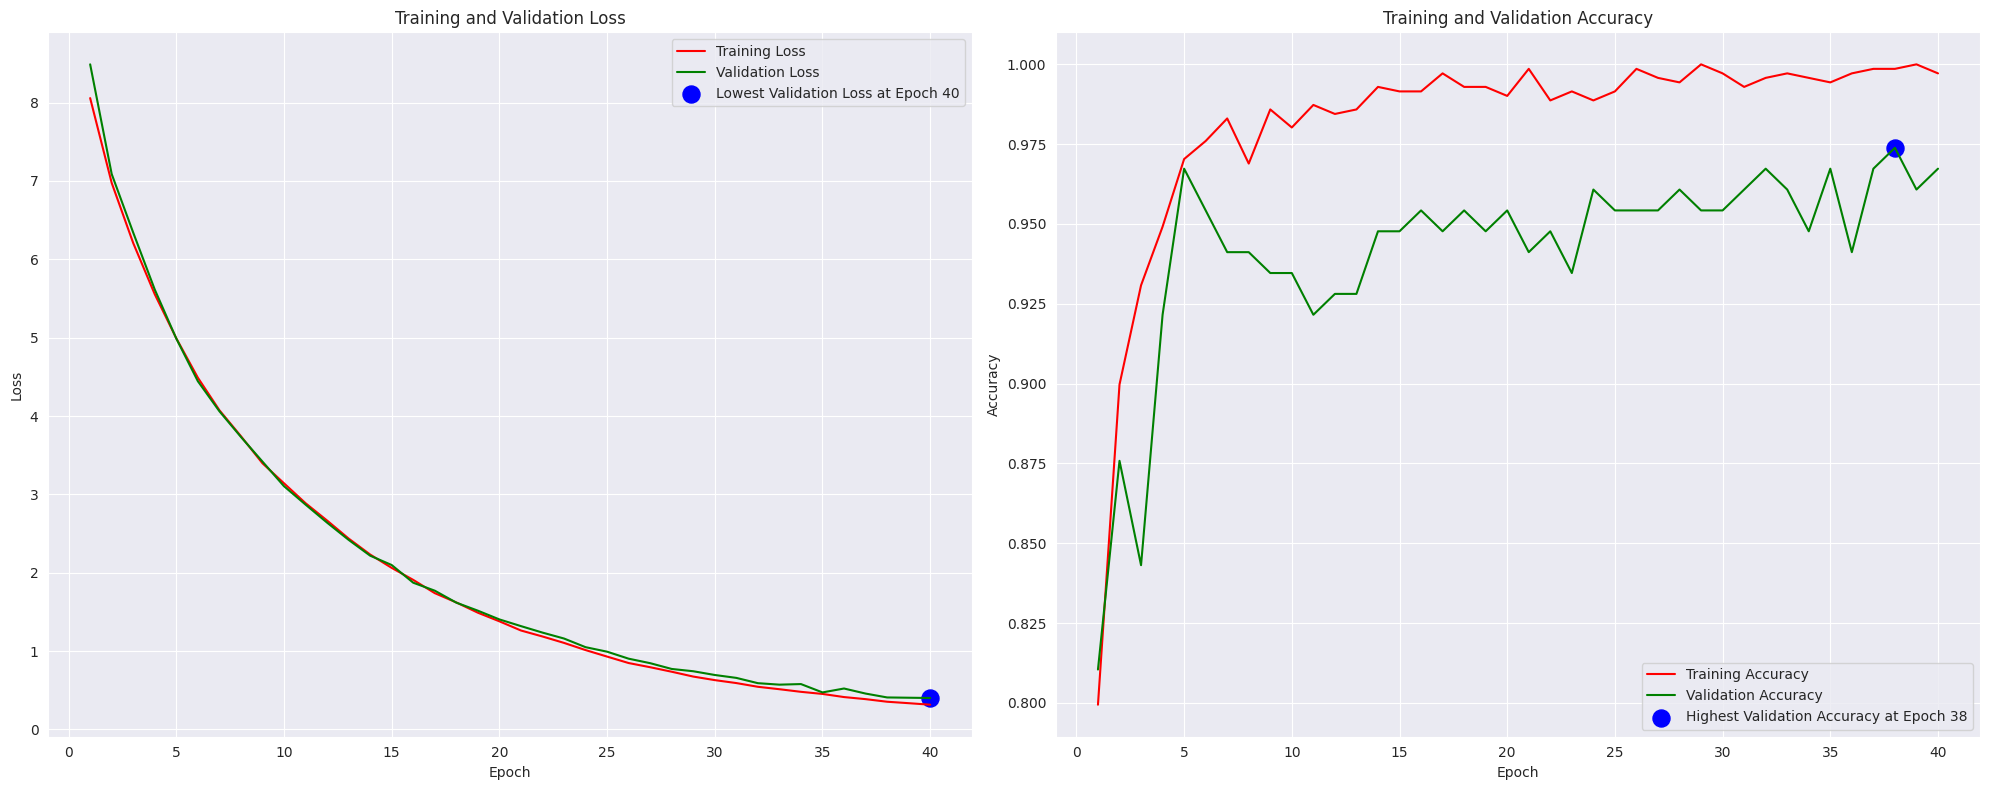

In [ ]:
def plot_training_history(history, start_epoch):
    # Get training and validation loss and accuracy histories
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    # Get the total number of epochs training was run for
    total_epochs = len(training_accuracy) + start_epoch

    # Create a list of epoch numbers
    epoch_nums = range(start_epoch + 1, total_epochs + 1)

    # Find the epoch at which validation loss was minimum and validation accuracy was maximum
    min_val_loss_epoch = np.argmin(validation_loss) + start_epoch + 1
    max_val_accuracy_epoch = np.argmax(validation_accuracy) + start_epoch + 1

    # Create a plot for loss
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_nums, training_loss, 'r', label='Training Loss')
    plt.plot(epoch_nums, validation_loss, 'g', label='Validation Loss')
    plt.scatter(min_val_loss_epoch, validation_loss[min_val_loss_epoch - start_epoch - 1], s=150, c='blue', label=f'Lowest Validation Loss at Epoch {min_val_loss_epoch}')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Create a plot for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epoch_nums, training_accuracy, 'r', label='Training Accuracy')
    plt.plot(epoch_nums, validation_accuracy, 'g', label='Validation Accuracy')
    plt.scatter(max_val_accuracy_epoch, validation_accuracy[max_val_accuracy_epoch - start_epoch - 1], s=150, c='blue', label=f'Highest Validation Accuracy at Epoch {max_val_accuracy_epoch}')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history, start_epoch=0)


**Plot Confusion Matrix**

2/2 [==============================] - 53s 49s/step
There were 6 errors in 154 tests for an accuracy of 96.10%


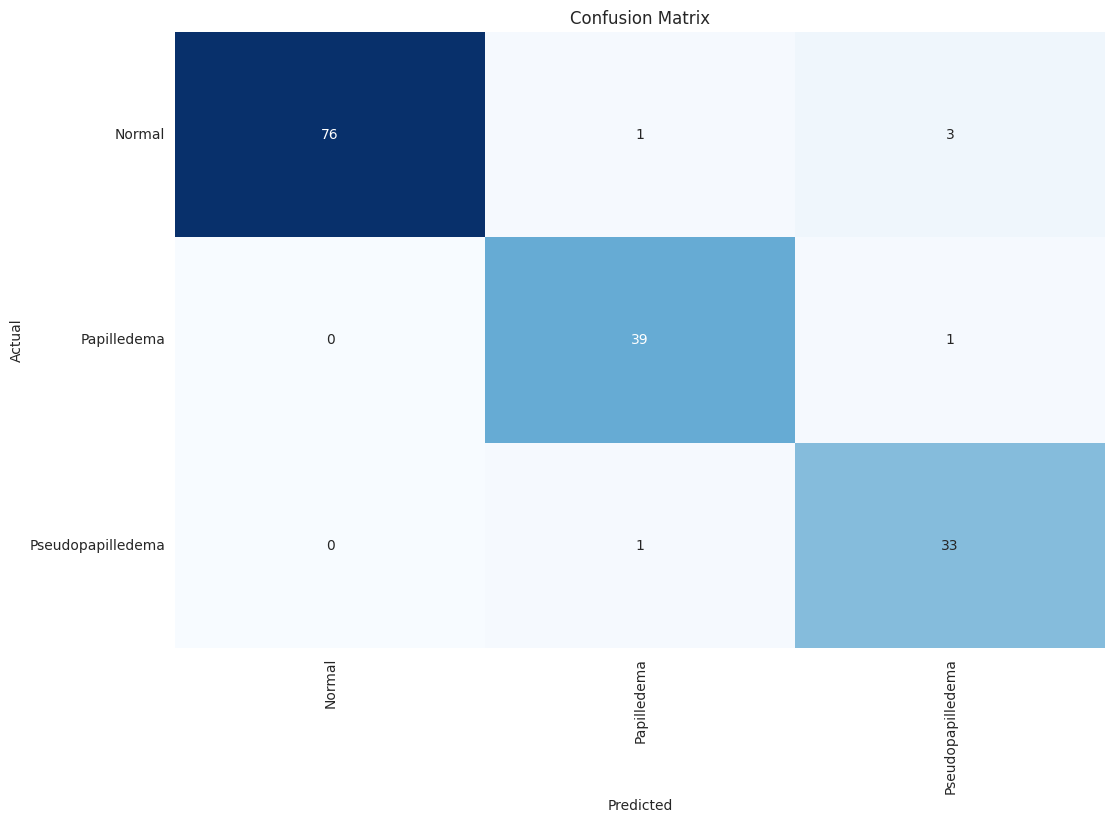

Classification Report:
----------------------
                    precision    recall  f1-score   support

           Normal     1.0000    0.9500    0.9744        80
      Papilledema     0.9512    0.9750    0.9630        40
Pseudopapilledema     0.8919    0.9706    0.9296        34

         accuracy                         0.9610       154
        macro avg     0.9477    0.9652    0.9556       154
     weighted avg     0.9635    0.9610    0.9615       154



In [ ]:
def evaluate_model(test_data_generator):
    # Get true labels and number of classes from test data generator
    true_labels = np.array(test_data_generator.labels)
    class_names = list(test_data_generator.class_indices.keys())
    num_classes = len(class_names)

    # Make predictions with the model
    predictions = model.predict(test_data_generator, verbose=1)
    predicted_indices = np.argmax(predictions, axis=-1)

    # Count errors and compute accuracy
    num_errors = np.sum(predicted_indices != true_labels)
    num_tests = len(predictions)
    accuracy = (1 - num_errors / num_tests) * 100

    print(f'There were {num_errors} errors in {num_tests} tests for an accuracy of {accuracy:.2f}%')

    if num_classes <= 30:
        # Display confusion matrix
        confusion_mtx = confusion_matrix(true_labels, predicted_indices)
        plt.figure(figsize=(12, 8))
        sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(ticks=np.arange(num_classes)+0.5, labels=class_names, rotation=90)
        plt.yticks(ticks=np.arange(num_classes)+0.5, labels=class_names, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    # Display classification report
    class_report = classification_report(true_labels, predicted_indices, target_names=class_names, digits=4)
    print("Classification Report:\n----------------------\n", class_report)

    return num_errors, num_tests

# Evaluate the model
num_errors, num_tests = evaluate_model(test_gen)


**Plot ROC Curve**

2/2 [==============================] - 1s 331ms/step


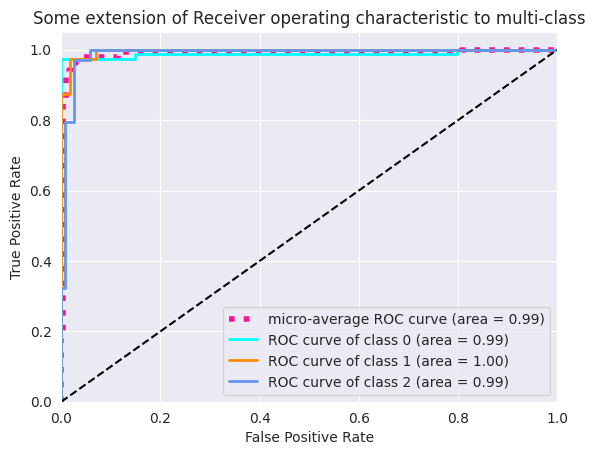

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import numpy as np

def plot_multi_class_roc_auc(model, test_gen, class_count):
    y_true = test_gen.labels
    y_pred = model.predict(test_gen)
    
    # Binarize the labels for ROC calculation
    y_true_bin = label_binarize(y_true, classes=np.arange(class_count))
    y_pred_bin = y_pred
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(class_count):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(class_count), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()


plot_multi_class_roc_auc(model, test_gen, class_count)



**END OF PART 1 OF THE DOCUMENTATION REPORT AUTHORED BY CHRISTOS ANTONOPOULOS**


________________________________________________________________________________


**START OF PART 2 OF THE DOCUMENTATION REPORT AUTHORED BY BLENDI BYLYGBASHI**

**Identifying images that the model incorrectly classified**

This code block is used to identify and visualize the images that the model has misclassified in the test set. 
First, it gets the model's predictions for the test data and determines the class with the highest predicted probability for each image.
Next, it compares these predicted labels with the true labels to find the indices of the misclassified images.
It then retrieves the filepaths of the misclassified images and extracts their filenames. 
For each misclassified image, it displays the image along with its true and predicted labels.
Finally, it prints out the filenames of the misclassified images. This information can be useful for understanding where the model is making mistakes.


2/2 [==============================] - 1s 338ms/step


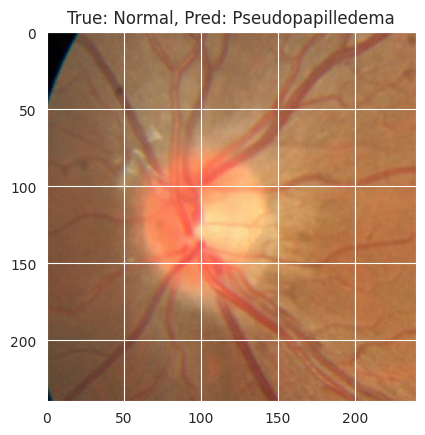

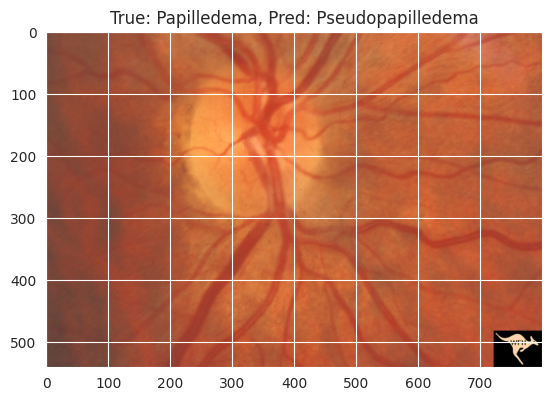

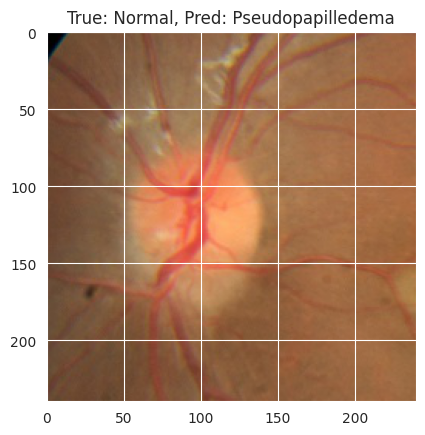

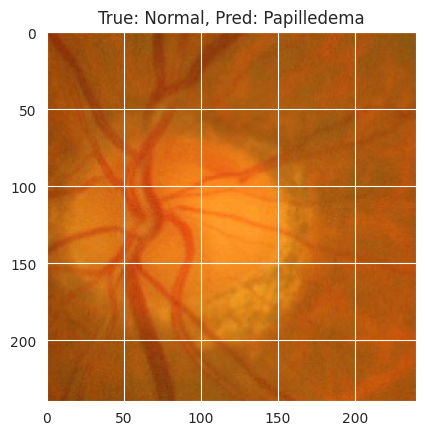

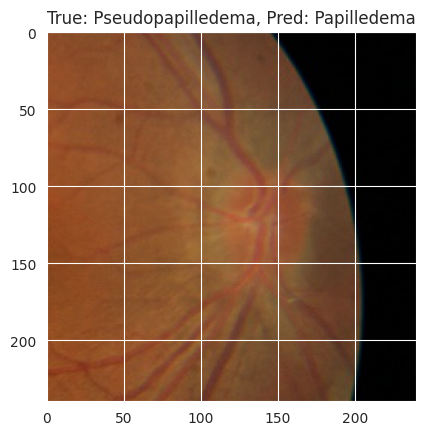

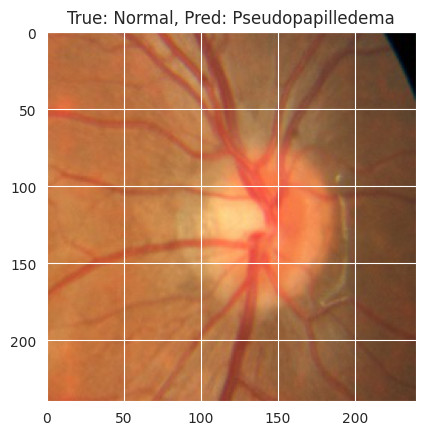

Files of wrongly classified images:
Normal/546.jpg
Papilledema/Αντίγραφο του Unilateral_Papilledema (3).jpg
Normal/370.jpg
Normal/683.jpg
Pseudopapilledema/176.jpg
Normal/243.jpg


In [ ]:
import matplotlib.pyplot as plt
import os

# Get the predictions for the test set
predictions = model.predict(test_gen)

# Get the class with the highest probability for each sample
pred_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = test_gen.labels

# Get the indices of the wrongly classified images
wrong_indices = np.nonzero(pred_labels != true_labels)[0]

# Get the filepaths of the wrongly classified images
wrong_images = [test_gen.filepaths[i] for i in wrong_indices]

# List to hold filenames of wrongly classified images
wrong_filenames = []

# For each wrongly classified image
for i, image_path in enumerate(wrong_images):
    # Load the image
    img = plt.imread(image_path)
    
    # Get the filename and the parent folder name
    folder_name = os.path.basename(os.path.dirname(image_path))
    filename = os.path.basename(image_path)

    # Combine the folder name and filename
    full_name = os.path.join(folder_name, filename)

    # Append full name to the list
    wrong_filenames.append(full_name)
    
    # Show the image
    plt.figure()
    plt.imshow(img)
    plt.title(f"True: {classes[true_labels[wrong_indices[i]]]}, Pred: {classes[pred_labels[wrong_indices[i]]]}")
    plt.show()

    # Optionally, you can stop after a certain number of images
    if i > 10:
        break

# Print out the full names of the wrongly classified images
print("Files of wrongly classified images:")
for full_name in wrong_filenames:
    print(full_name)





In [ ]:
!pip install opencv-python-headless


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Plot Precision-Recall Curve**

This script calculates and displays the precision-recall curves for the three different classes. This is another useful metric for evaluating the performance of our machine learning model. There are two primary inputs to the script, both of which are defined in earlier scripts:

1.   The true labels (test_gen.classes)
2.   The model's predicted pribabilities for each class (model.precict(test_gen))

The precision and recall average values are found for each class. The micro-averaged values of these are then calculated. They give us a metric that can be used as a summary of the model's performance and this is visualised in the graph that is generated.




2/2 [==============================] - 1s 359ms/step
Average precision score, micro-averaged over all classes: 0.98


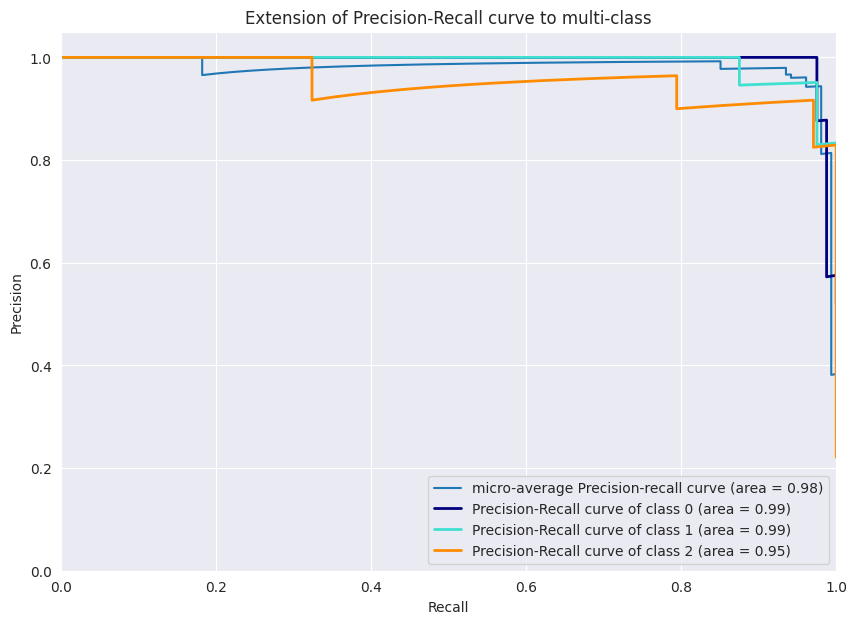

In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


# Binarize the output
# This process transforms the multiclass labels into a binary format that's easier for the model to process.
y_true_bin = label_binarize(test_gen.classes, classes=[0, 1, 2])
n_classes = y_true_bin.shape[1]

# Predict the probabilities for the test set
y_score = model.predict(test_gen)

# Here, we initialize dictionaries to hold precision, recall and average_precision values for each class
precision = dict()
recall = dict()
average_precision = dict()

# Now, for each class, we calculate precision and recall values and store them in the dictionaries
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], y_score[:, i])

# Next, we calculate the micro-averaged precision and recall values over all classes, giving us a single score that summarizes the overall performance of our model.
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_true_bin, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

# Now we plot the precision-recall curves. The first plot is a micro-averaged curve, which gives an overall summary of model performance.

# Setup figure size
plt.figure(figsize=(10, 7))
# Plot the micro-averaged Precision-Recall curve
plt.plot(recall["micro"], precision["micro"], label='micro-average Precision-recall curve (area = {0:0.2f})'.format(average_precision["micro"]))

# We then plot a precision-recall curve for each class separately. This allows us to see how well the model performs for each individual class.
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Precision-Recall curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

# Finally, we set the labels and title for our plot and show it.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()


**Classes Reminder**

This simple script serves the purpose of reminding the user what each of classes 0, 1 and 2 correspond to.

In [ ]:
class_indices = train_gen.class_indices  # Get the class indices mapping
class_names = list(class_indices.keys())  # Get the class names

class_idx_0 = 0  # Index of class 0
class_idx_1 = 1  # Index of class 1
class_idx_2 = 2  # Index of class 2

class_name_0 = class_names[class_idx_0]  # Get the name of class 0
class_name_1 = class_names[class_idx_1]  # Get the name of class 1
class_name_2 = class_names[class_idx_2]  # Get the name of class 2

print(f"Class 0: {class_name_0}")
print(f"Class 1: {class_name_1}")
print(f"Class 2: {class_name_2}")

Class 0: Normal
Class 1: Papilledema
Class 2: Pseudopapilledema


#Gradient - Weighted Class Activation Mapping (Grad-CAM)





**Identifying layers of the EfficientNetB3 Model**

This script displays a list of all the layers in the EfficientNetB3 model. The enumerate function is used to loop over these layers while keeping track of the current loop index (i).

For each layer, the layer's index, its name (layer.name), and the class/type of the layer (layer.__class__.__name__) are printed.

The purpose of this is to allow us to then use these layer names to examine the nature of the operations in each layer, which will be done in the next few scripts using the Grad-CAM method.


In [ ]:
# For each layer in the model
for i, layer in enumerate(model.layers):
   # Print the index, name and class of the layer
   print(i, layer.name, layer.__class__.__name__)


0 input_3 InputLayer
1 rescaling_3 Rescaling
2 normalization_2 Normalization
3 rescaling_4 Rescaling
4 stem_conv_pad ZeroPadding2D
5 stem_conv Conv2D
6 stem_bn BatchNormalization
7 stem_activation Activation
8 block1a_dwconv DepthwiseConv2D
9 block1a_bn BatchNormalization
10 block1a_activation Activation
11 block1a_se_squeeze GlobalAveragePooling2D
12 block1a_se_reshape Reshape
13 block1a_se_reduce Conv2D
14 block1a_se_expand Conv2D
15 block1a_se_excite Multiply
16 block1a_project_conv Conv2D
17 block1a_project_bn BatchNormalization
18 block1b_dwconv DepthwiseConv2D
19 block1b_bn BatchNormalization
20 block1b_activation Activation
21 block1b_se_squeeze GlobalAveragePooling2D
22 block1b_se_reshape Reshape
23 block1b_se_reduce Conv2D
24 block1b_se_expand Conv2D
25 block1b_se_excite Multiply
26 block1b_project_conv Conv2D
27 block1b_project_bn BatchNormalization
28 block1b_drop Dropout
29 block1b_add Add
30 block2a_expand_conv Conv2D
31 block2a_expand_bn BatchNormalization
32 block2a_expa

**Preliminary Testing of Grad-CAM for the EfficientNetB3 Model**

This script constructs an EfficientNetB3 model, computes the gradients of the model's class prediction with respect to the 'top_activation' layer's output (or any layer that is chosen) and then uses these gradients to create a heatmap of the important regions that the model is "looking at" in order to make a prediction. This is one method of visually interpreting the model's decision-making process.

The script serves as a preliminary testing stage that was initially carried out with a separately constructed EfficientNetB3 model to assess viability of the Grad-CAM method. The next script incorporates this method to the actual trained model.

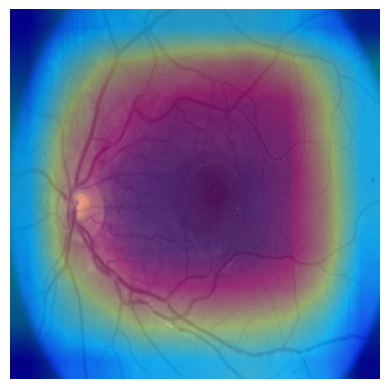

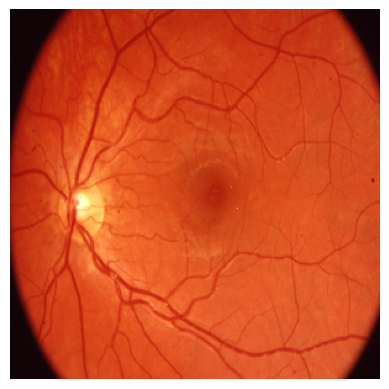

In [ ]:
import cv2
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 

# Build the model
cam_inputs = tf.keras.Input(shape=(300, 300, 3))

# Set up an EfficientNetB3 backbone for the model
cam_x = keras.applications.EfficientNetB3(input_tensor=cam_inputs, include_top=False, weights=None)
cam_x = layers.GlobalAveragePooling2D()(cam_x.output) 
cam_x = layers.Dense(128)(cam_x)
cam_x = layers.Dropout(0.5)(cam_x)
cam_x = layers.Dense(3)(cam_x)
cam_model = keras.Model(cam_inputs, cam_x)

# Build Grad-CAM Model (intermediate model that outputs 'top_activation' layer's output and final model's output)
grad_cam_model = keras.models.Model([cam_model.inputs], [cam_model.get_layer('top_activation').output, cam_model.output])

# Preprocess the image for the model
cam_image = cv2.imread('/content/drive/MyDrive/Test_Images_New/Normal/normal-fundus.png')
cam_image = cv2.resize(cam_image, (300, 300))
cam_image = cam_image / 255.0  # normalize to [0,1]
cam_image = np.expand_dims(cam_image, axis=0)  # add batch dimension

# Record operations for automatic differentiation
with tf.GradientTape() as cam_tape:
    # Forward pass
    cam_convOutputs, cam_predictions = grad_cam_model(tf.cast(cam_image, tf.float32))
    # Compute the loss value (the loss function is assumed to be the cross-entropy)
    cam_loss = cam_predictions[:, tf.argmax(cam_predictions[0])]

# Derive the gradients of the predicted class with respect to the output of the 'top_activation' layer
cam_grads = cam_tape.gradient(cam_loss, cam_convOutputs)

# Compute guided gradients
cam_castConvOutputs = tf.cast(cam_convOutputs > 0, "float32")
cam_castGrads = tf.cast(cam_grads > 0, "float32")
cam_guidedGrads = cam_castConvOutputs * cam_castGrads * cam_grads

# Remove the batch dimension
cam_convOutputs = cam_convOutputs[0]
cam_guidedGrads = cam_guidedGrads[0]

# Compute the average of the gradients spatially
cam_weights = tf.reduce_mean(cam_guidedGrads, axis=(0, 1))

# Compute a weighted combination of the feature maps
cam_cam = tf.reduce_sum(tf.multiply(cam_weights, cam_convOutputs), axis=-1)

# Resize heatmap to match the input image dimensions
(w, h) = (cam_image.shape[2], cam_image.shape[1])
cam_heatmap = cv2.resize(cam_cam.numpy(), (w, h))

# Normalize the heatmap such that all values lie in the range [0, 1]
cam_heatmap = np.maximum(cam_heatmap, 0)
cam_heatmap /= np.max(cam_heatmap)
cam_heatmap = cv2.applyColorMap(np.uint8(255*cam_heatmap), cv2.COLORMAP_JET)

# Get the original image from the batch dimension
cam_original_image = cam_image[0]

# Ensure the image is in the range [0, 255] for visualization
cam_original_image = np.uint8(255 * cam_original_image)

# Convert the original image color format from RGB to BGR 
cam_original_image = cv2.cvtColor(cam_original_image, cv2.COLOR_RGB2BGR)

# Superimpose the heatmap on original image
cam_output_image = cv2.addWeighted(cam_original_image, 0.5, cam_heatmap, 0.5, 0)

import matplotlib.pyplot as plt

# Convert BGR image to RGB
cam_output_image_rgb = cv2.cvtColor(cam_output_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(cam_output_image_rgb)
plt.axis('off')  # remove axes for visual appeal
plt.show()

plt.imshow(cam_original_image)
plt.axis('off')  # remove axes for visual appeal
plt.show()


**Grad-CAM for our Trained Model**

This script is similar to the last one in that it uses the Grad-CAM method to aid in visualising the operations of any chosen layer, except in this case the model used is our trained EfficientNetB3 model.

In this specific example, we are examiming the block6e_project_conv convolution layer, and this can be changed to look at any layer by using the layer names of the model, given in the earlier script.

The weights and structure of the pre-trained model are preserved, but the output is now the combination of the chosen convolution layer's output and the original model's output.

An image is loaded, resized to the input size of the model, normalized, and a batch dimension is added.

The model's output for this image is then calculated, and the gradient of the predicted class (the class with the highest probability) with respect to the output of the convolutional layer is computed. This gradient indicates how much each output neuron of the convolutional layer contributes to the prediction.

The guided gradients are then computed, which are the gradients where the activation and the gradients of the chosen layer are positive.

A class activation map (CAM) is computed by taking a spatial average of these guided gradients, which gives a coarse heatmap of the same size as the output of the convolutional layer.

This heatmap is then resized to the size of the original input image and applied to the original image to give a visual indication of where the model is "looking" when it makes its prediction.

Finally, the original image and the image with the heatmap are displayed for comparison. The image with the heatmap shows the regions that influenced the model's decision the most.

Overall, this script is a powerful tool for visualizing and understanding what a deep learning model has learned and what features it finds important for its predictions. It is particularly useful for interpreting the predictions of convolutional neural networks.

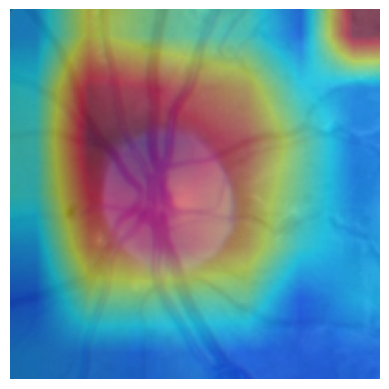

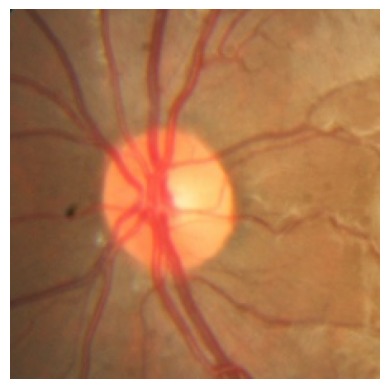

In [ ]:
import cv2
import tensorflow as tf 
from tensorflow import keras
import numpy as np 

# The trained model is called 'model'

# Get the convolutional layer whose output you want for Grad-CAM
conv_layer = model.get_layer('block6e_project_conv')  # Replace with any convolution layer

# Build Grad-CAM Model
grad_cam_model = keras.models.Model([model.inputs], [conv_layer.output, model.output])

cam_image = cv2.imread('/content/drive/MyDrive//Papilledema_Data_2/Normal/188.jpg')
cam_image = cv2.resize(cam_image, (224, 224))
cam_image = cam_image / 255.0  # normalize to [0,1]
cam_image = np.expand_dims(cam_image, axis=0)  # add batch dimension

# Record operations for automatic differentiation
with tf.GradientTape() as cam_tape:
    cam_convOutputs, cam_predictions = grad_cam_model(tf.cast(cam_image, tf.float32))
    cam_loss = cam_predictions[:, tf.argmax(cam_predictions[0])]

# Derive the gradients
cam_grads = cam_tape.gradient(cam_loss, cam_convOutputs)

# Compute guided gradients
cam_castConvOutputs = tf.cast(cam_convOutputs > 0, "float32")
cam_castGrads = tf.cast(cam_grads > 0, "float32")
cam_guidedGrads = cam_castConvOutputs * cam_castGrads * cam_grads

# Remove the batch dimension
cam_convOutputs = cam_convOutputs[0]
cam_guidedGrads = cam_guidedGrads[0]

# Compute the average of the gradients spatially
cam_weights = tf.reduce_mean(cam_guidedGrads, axis=(0, 1))

# Create a new tensor with the same shape as the gradients
cam_cam = tf.reduce_sum(tf.multiply(cam_weights, cam_convOutputs), axis=-1)

# Normalize the heatmap such that all values lie in the range
cam_cam = np.maximum(cam_cam, 0)
cam_cam /= np.max(cam_cam)

# Resize heatmap to original image dimensions
heatmap = cv2.resize(cam_cam, (cam_image.shape[2], cam_image.shape[1]))
# Apply the heatmap to the original image
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Get the original image from the batch dimension
cam_original_image = cam_image[0]

# Ensure the image is in the range [0, 255] for visualization
cam_original_image = np.uint8(255 * cam_original_image)

# Convert the original image color format from RGB to BGR 
cam_original_image = cv2.cvtColor(cam_original_image, cv2.COLOR_RGB2BGR)

# Superimpose the heatmap on original image
cam_output_image = cv2.addWeighted(cam_original_image, 0.5, heatmap, 0.5, 0)

import matplotlib.pyplot as plt

# Convert BGR image to RGB
cam_output_image_rgb = cv2.cvtColor(cam_output_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(cam_output_image_rgb)
plt.axis('off')  # remove axes for visual appeal
plt.show()

plt.imshow(cam_original_image)
plt.axis('off')  # remove axes for visual appeal
plt.show()


**Grad-CAM Visualisation on one Preprocessed Image (Preliminary)**

*This is once again preliminary testing. The next script uses our trained model.*

The script starts by creating a model using the EfficientNetB3 architecture.This model is designed to accept an input image and output a prediction across three classes.

Another model, grad_cam_model, is then constructed. This model takes the same input as the original model but outputs both the final layer's output and the original model's output.

Next, the script fetches a batch of images and labels from a generator named train_gen. It selects the first image from this batch to apply the Grad-CAM method.

The selected image is normalized if it isn't already in the range [0,1]. A batch dimension is then added to the image.

With the help of tf.GradientTape(), the script records operations for automatic differentiation. Using the grad_cam_model, the script computes convolutional outputs and predictions for the image. The loss is calculated as the prediction of the class with the highest probability.

The script then derives gradients by differentiating the loss with respect to the convolutional outputs. The guided gradients are calculated where the activation and gradients are positive.

The batch dimension is removed from the convolutional outputs and the guided gradients. The average of the guided gradients is computed spatially to give a set of weights.

A class activation map (CAM) is generated by creating a new tensor with the same shape as the gradients. The heatmap is then resized to match the input image dimensions.

To ensure all values lie in the range [0,1], the heatmap is normalized. It is then color-mapped for better visualization.

The original image is extracted from the batch dimension, ensuring it's in the range [0, 255] for visualization. The original image's color format is converted from RGB to BGR.

The heatmap is superimposed on the original image to provide a visualization of what the model focuses on when making predictions.

Finally, the script displays the original image and the output image (with the heatmap applied) for comparison.

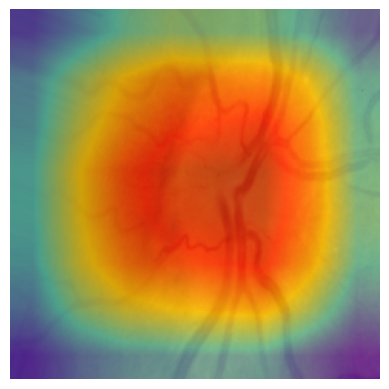

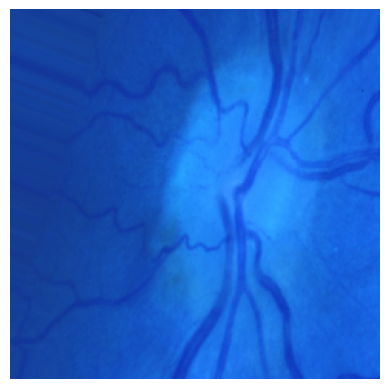

In [ ]:
import cv2
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 

# Build the model
cam_inputs = tf.keras.Input(shape=(240, 240, 3))
cam_x = keras.applications.EfficientNetB3(input_tensor=cam_inputs, include_top=False, weights=None)
cam_x = layers.GlobalAveragePooling2D()(cam_x.output) 
cam_x = layers.Dense(128)(cam_x)
cam_x = layers.Dropout(0.5)(cam_x)
cam_x = layers.Dense(3)(cam_x)
cam_model = keras.Model(cam_inputs, cam_x)

# Build Grad-CAM Model
grad_cam_model = keras.models.Model([cam_model.inputs], [cam_model.get_layer('top_activation').output, cam_model.output])

# Fetch a batch of images and labels from train_gen
images, labels = next(train_gen)

# Use the first image from the batch for Grad-CAM
cam_image = images[0]

# Check if the image is already normalized to [0,1], if not normalize it
if np.max(cam_image) > 1:
    cam_image = cam_image / 255.0

# Add batch dimension
cam_image = np.expand_dims(cam_image, axis=0) 

# Record operations for automatic differentiation
with tf.GradientTape() as cam_tape:
    cam_convOutputs, cam_predictions = grad_cam_model(tf.cast(cam_image, tf.float32))
    cam_loss = cam_predictions[:, tf.argmax(cam_predictions[0])]

# Derive the gradients
cam_grads = cam_tape.gradient(cam_loss, cam_convOutputs)

# Compute guided gradients
cam_castConvOutputs = tf.cast(cam_convOutputs > 0, "float32")
cam_castGrads = tf.cast(cam_grads > 0, "float32")
cam_guidedGrads = cam_castConvOutputs * cam_castGrads * cam_grads

# Remove the batch dimension
cam_convOutputs = cam_convOutputs[0]
cam_guidedGrads = cam_guidedGrads[0]

# Compute the average of the gradients spatially
cam_weights = tf.reduce_mean(cam_guidedGrads, axis=(0, 1))

# Create a new tensor with the same shape as the gradients
cam_cam = tf.reduce_sum(tf.multiply(cam_weights, cam_convOutputs), axis=-1)

# Resize heatmap to match the input image dimensions
(w, h) = (cam_image.shape[2], cam_image.shape[1])
cam_heatmap = cv2.resize(cam_cam.numpy(), (w, h))

# Normalize the heatmap such that all values lie in the range
cam_heatmap = np.maximum(cam_heatmap, 0)
cam_heatmap /= np.max(cam_heatmap)
cam_heatmap = cv2.applyColorMap(np.uint8(255*cam_heatmap), cv2.COLORMAP_JET)

# Get the original image from the batch dimension
cam_original_image = cam_image[0]

# Ensure the image is in the range [0, 255] for visualization
cam_original_image = np.uint8(255 * cam_original_image)

# Convert the original image color format from RGB to BGR 
cam_original_image = cv2.cvtColor(cam_original_image, cv2.COLOR_RGB2BGR)

# Superimpose the heatmap on original image
cam_output_image = cv2.addWeighted(cam_original_image, 0.5, cam_heatmap, 0.5, 0)

import matplotlib.pyplot as plt

# Convert BGR image to RGB
cam_output_image_rgb = cv2.cvtColor(cam_output_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(cam_output_image_rgb)
plt.axis('off')  # remove axes for visual appeal
plt.show()

plt.imshow(cam_original_image)
plt.axis('off')  # remove axes for visual appeal
plt.show()


**Grad-CAM Visualisation on one Preprocessed Image Using our Trained Model**

This script uses our trained model, called simply 'model', for Grad-CAM (Gradient-weighted Class Activation Mapping). A new model, grad_cam_model, is built based on the pre-trained model. It outputs both the convolutional layer's output ('block6e_project_conv' layer) and the original model's output.

The steps taken to achieve this heatmap are the same as those highlighted in earlier scripts, except this time it takes one of the pre-processed images from the training set and shows the heatmap for this, for the layer selected.




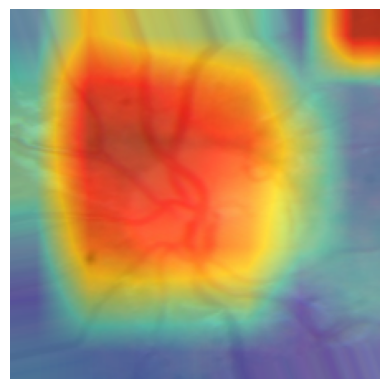

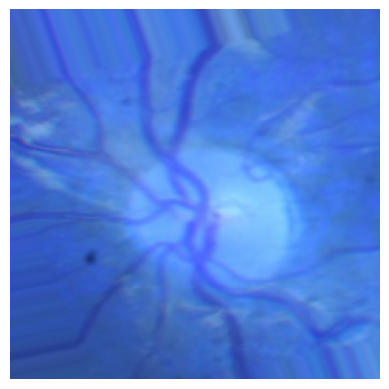

In [ ]:
import cv2
import tensorflow as tf 
from tensorflow import keras
import numpy as np 

# Use the pre-trained model, called 'model'

# Build Grad-CAM Model
grad_cam_model = keras.models.Model([model.inputs], [model.get_layer('block6e_project_conv').output, model.output]) # Replace with a convolution layer of your choosing

# Fetch a batch of images and labels from train_gen
images, labels = next(train_gen)

# Use the first image from the batch for Grad-CAM
cam_image = images[0]

# Resize the image to the expected input shape (224, 224)
cam_image = cv2.resize(cam_image, (224, 224))

# Check if the image is already normalized to [0,1], if not normalize it
if np.max(cam_image) > 1:
    cam_image = cam_image / 255.0

# Add batch dimension
cam_image = np.expand_dims(cam_image, axis=0) 

# Record operations for automatic differentiation
with tf.GradientTape() as cam_tape:
    cam_convOutputs, cam_predictions = grad_cam_model(tf.cast(cam_image, tf.float32))
    cam_loss = cam_predictions[:, tf.argmax(cam_predictions[0])]

# Derive the gradients
cam_grads = cam_tape.gradient(cam_loss, cam_convOutputs)

# Compute guided gradients
cam_castConvOutputs = tf.cast(cam_convOutputs > 0, "float32")
cam_castGrads = tf.cast(cam_grads > 0, "float32")
cam_guidedGrads = cam_castConvOutputs * cam_castGrads * cam_grads

# Remove the batch dimension
cam_convOutputs = cam_convOutputs[0]
cam_guidedGrads = cam_guidedGrads[0]

# Compute the average of the gradients spatially
cam_weights = tf.reduce_mean(cam_guidedGrads, axis=(0, 1))

# Create a new tensor with the same shape as the gradients
cam_cam = tf.reduce_sum(tf.multiply(cam_weights, cam_convOutputs), axis=-1)

# Resize heatmap to match the input image dimensions
(w, h) = (cam_image.shape[2], cam_image.shape[1])
cam_heatmap = cv2.resize(cam_cam.numpy(), (w, h))

# Normalize the heatmap such that all values lie in the range
cam_heatmap = np.maximum(cam_heatmap, 0)
cam_heatmap /= np.max(cam_heatmap)
cam_heatmap = cv2.applyColorMap(np.uint8(255*cam_heatmap), cv2.COLORMAP_JET)

# Get the original image from the batch dimension
cam_original_image = cam_image[0]

# Ensure the image is in the range [0, 255] for visualization
cam_original_image = np.uint8(255 * cam_original_image)

# Convert the original image color format from RGB to BGR 
cam_original_image = cv2.cvtColor(cam_original_image, cv2.COLOR_RGB2BGR)

# Superimpose the heatmap on original image
cam_output_image = cv2.addWeighted(cam_original_image, 0.5, cam_heatmap, 0.5, 0)

import matplotlib.pyplot as plt

# Convert BGR image to RGB
cam_output_image_rgb = cv2.cvtColor(cam_output_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(cam_output_image_rgb)
plt.axis('off')  # remove axes for visual appeal
plt.show()

plt.imshow(cam_original_image)
plt.axis('off')  # remove axes for visual appeal
plt.show()


# Further Testing and Processing

**Show the model's prediction for any given image**

The script begins by importing necessary modules from Keras. The function predict_class is defined to predict the class of an image. The function loads an image from the specified file path and resizes it to the input size that the model expects (224x224 pixels in this case).

The loaded image is then converted to a numpy array so it can be processed by the model. The line that carries out Gaussian colour subtraction can be removed if this processing step was not used in the pre-processing. Otherwise, Gaussian colour subtraction will be carried out.

The image array is then expanded with an additional dimension to represent the batch size. This is necessary because the model expects to receive the input images in batches.

The image array is preprocessed by converting the pixel values from integers to floats and scaling them to a range suitable for the model (usually 0 to 1 or -1 to 1).

The model makes a prediction on the preprocessed image, and the class with the highest prediction probability is identified.

The function returns the label of the identified class.

For testing purposes, the path to an image file is specified.

The predict_class function is called with the model and the test image path as arguments, and the predicted class label is printed out.


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input


def predict_class(model, image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))  # adjust target size to match your model input
    
    # Convert the image to numpy array
    img_array = img_to_array(img)
    
    # Apply Gaussian color subtraction
    img_array = gaussian_color_subtraction(img_array)
    
    # Expand the dimensions of the image as we are predicting on a single instance
    img_batch = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image
    img_preprocessed = preprocess_input(img_batch)
    
    # Use the model to predict the class
    prediction = model.predict(img_preprocessed)
    
    # Get the class with highest probability
    predicted_class = np.argmax(prediction)
    
    # Convert class indices back to class labels and return
    return classes[predicted_class]

# Testing
image_path = "/content/drive/MyDrive/Test_Images_New/Papilledema/original.jpg"
print(predict_class(model, image_path))


NameError: ignored

**Testing with Unseen Data Set (Images are of the Full Fundus):**

The script begins by importing necessary modules from Keras and Scikit-Learn. 

The function predict_class is defined to predict the class of an image. It loads an image from the specified file path and resizes it to the input size that the model expects.

The loaded image is then converted to a numpy array and is processed by a Gaussian color subtraction function. Again, this line can be removed if Gaussian colour subtraction was not used in the pre-processing.

The image array is then expanded with an additional dimension to represent the batch size because the model expects to receive the input images in batches.

The image array is preprocessed by converting the pixel values from integers to floats and scaling them to a range suitable for the model.

The model makes a prediction on the preprocessed image, and the class with the highest prediction probability is identified.

The function returns the label of the identified class.

The function evaluate_model is defined to compute the test accuracy of the model on a new, unseen dataset.

It iterates over each subfolder in the specified test folder, where each subfolder corresponds to a different class.

For each image in each subfolder, it uses the predict_class function to predict the class of the image.

It adds the true class and predicted class to their respective lists, and prints out the actual and predicted classes.

Finally, it computes the test accuracy by comparing the list of true labels with the list of predicted labels using the accuracy_score function from Scikit-Learn.

The test folder and the list of classes are defined.

The evaluate_model function is then called with the model, test folder, and class list as arguments, and the test accuracy is printed out.

In this specific file, the unseen data is comprised of images of the entire fundus, and not only the part of the fundus that is zoomed into the optic disc, unlike the training data. As a result, the model struggles to predict the classes in this case. The following scripts are an initial attempt to isolate the optic disc from a full fundus image, although it is likely that a new ML model wil be needed for this segmentation task if the zooming into the optic disc is not viable through hardware.


In [ ]:
from sklearn.metrics import accuracy_score
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_class(model, image_path):
    # Load the image
    img = load_img(image_path, target_size=(240, 240))  # adjust target size to match model's expected input size
    
    # Convert the image to numpy array and apply Gaussian color subtraction
    img_array = img_to_array(img)
    img_array = gaussian_color_subtraction(img_array)
    
    # Expand the dimensions of the image as we are predicting on a single instance
    img_batch = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image
    img_preprocessed = preprocess_input(img_batch)
    
    # Use the model to predict the class
    prediction = model.predict(img_preprocessed)
    
    # Get the class with highest probability
    predicted_class = np.argmax(prediction)
    
    # Convert class indices back to class labels and return
    return classes[predicted_class]

def evaluate_model(model, test_folder, classes):
    true_labels = []
    predicted_labels = []

    # Iterate over each subfolder corresponding to a class in the test folder
    for class_folder_name in os.listdir(test_folder):
        class_folder_path = os.path.join(test_folder, class_folder_name)

        # Check if it's a folder
        if os.path.isdir(class_folder_path):

            # Iterate over each image in the subfolder
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)

                # Predict the class of the image
                predicted_class = predict_class(model, image_path)

                # Add the true class and predicted class to their respective lists
                true_labels.append(class_folder_name)
                predicted_labels.append(predicted_class)

                # Print out the actual and predicted classes
                print(f"Image: {image_name}")
                print(f"Actual class: {class_folder_name}")
                print(f"Predicted class: {predicted_class}")
                print("-------------------------------")

    # Compute the test accuracy
    test_accuracy = accuracy_score(true_labels, predicted_labels)

    return test_accuracy


# Define the test folder and the class list
test_folder = "/content/drive/MyDrive/Test_Images_New"
classes = ['Normal', 'Papilledema', 'Pseudopapilledema']

# Call the function and print the accuracy
print(evaluate_model(model, test_folder, classes))


1/1 [==============================] - 3s 3s/step
Image: Papilledema.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------
1/1 [==============================] - 0s 31ms/step
Image: Papilledema_high.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------
1/1 [==============================] - 0s 32ms/step
Image: 800px-Severe_papilledema.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------
1/1 [==============================] - 0s 31ms/step
Image: papilledema-2.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------
1/1 [==============================] - 0s 30ms/step
Image: CSpicsDiscedema.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------
1/1 [==============================] - 0s 31ms/step
Image: papilledema..jpg.png
Actual class: Papilledema
Predicted class: Pseudopapilledema
---------------------------

**Attempting to Isolate the Optic Disc**

This script defines a function for isolating the optic disc from a retinal fundus image. First, the script imports the necessary libraries: cv2 for image processing, and numpy for numerical operations. 

The function isolate_optic_disk is defined to take an image as input. Inside the function, the input image is first converted to grayscale. This simplifies the image and reduces computational complexity. Next, a threshold operation is applied to the grayscale image. This creates a binary image where bright areas (such as the optic disc) are white (255), and darker areas are black (0).

Morphological operations are then performed to remove small areas of noise in the binary image. The kernel size and the number of iterations may need to be adjusted based on the specifics of the images.

Contours (boundaries of connected white pixels) are then found in the cleaned-up binary image.

The contours are filtered based on area to keep only the large contours. The threshold value for the contour area will depend on the size of the optic discs in the images.

An empty mask of the same size as the grayscale image is created. The large contours are drawn on this mask.

Finally, a bitwise 'and' operation is performed between the original image and the mask. This leaves only the regions of the original image where the mask is white, effectively isolating the optic disc.

The function returns the resultant image, which is the original image with the optic nerve hopefully isolated at least somewhat.


In [ ]:
import cv2
import numpy as np

def isolate_optic_disk(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to isolate bright areas
    _, thresholded = cv2.threshold(gray, 135, 255, cv2.THRESH_BINARY)

    # Perform morphological operations to remove small noise
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations = 2)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours based on area
    min_area = 500  # This value will depend on the size of the optic disc in your images
    large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # Create an empty mask to draw the contours
    mask = np.zeros_like(gray)

    # Draw the contours on the mask
    cv2.drawContours(mask, large_contours, -1, (255), thickness=cv2.FILLED)

    # Bitwise-and with the original image
    result = cv2.bitwise_and(image, image, mask=mask)
    
    return result


**Results of this Attempt**

This script is meant to visualize the output of the optic disc isolation process.

The matplotlib library is imported for plotting capabilities.

A function named 'display_images' is defined to display two images side by side. The function takes as input two images: the original and the resultant image.

Inside the function, a figure with two subplots is created using plt.subplots. 
The two images are then displayed on these subplots, with the original image on the left and the resultant image on the right. Note that the images are converted from BGR to RGB color space for proper display with matplotlib.

After defining the function, the path to an image is specified. The image is then read into memory using the cv2.imread function.

The previously defined 'isolate_optic_disk' function is applied to the image.

Finally, the 'display_images' function is used to display the original and isolated images side by side. This helps in visualizing the effect of the optic disc isolation process.


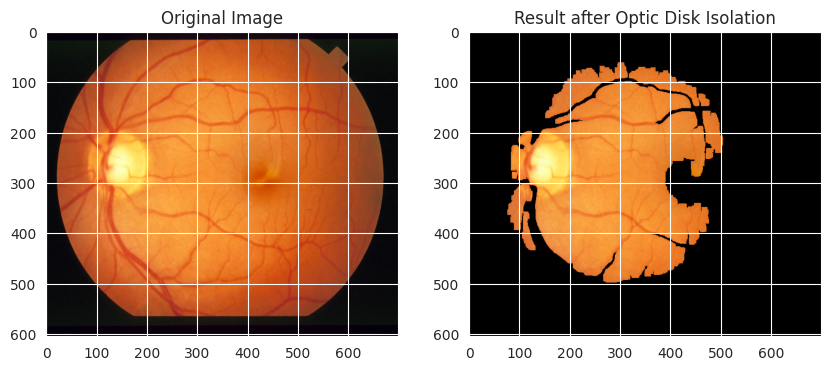

In [ ]:
import matplotlib.pyplot as plt

def display_images(original, result):
    # Display the original image and the result side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Result after Optic Disk Isolation')
    plt.show()

# Specify the path to your image
image_path = "/content/drive/MyDrive/Test_Images_New/Normal/im0235.ppm"

# Read the image using OpenCV
original_image = cv2.imread(image_path)

# Apply the function to isolate the optic disc
isolated_image = isolate_optic_disk(original_image)

# Display the original image and the result
display_images(original_image, isolated_image)


**Gaussian Subtraction + Isolation Attempt**

This script integrates the processes of optic disc isolation, model prediction, and evaluation into one workflow.

The isolate_optic_disk function processes an image to isolate the optic disc. It utilizes several image processing techniques, including grayscale conversion, thresholding, morphological operations, and contour detection, as highlighted previously.

The predict_class function first loads and preprocesses an image, including resizing and optic disc isolation. It then uses a pretrained model to predict the class of the image, based on its processed features.

The evaluate_model function evaluates the model's performance across multiple images in a test dataset. For each image, it records the true class (from the folder name) and the predicted class (from the predict_class function), and then calculates the accuracy of the model's predictions.

Note: plt.imshow() and plt.show() are used inside the predict_class function for visualizing the image after isolation (and Gaussian color subtraction, if required).


In [ ]:
from sklearn.metrics import accuracy_score
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isolate_optic_disk(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to isolate bright areas
    _, thresholded = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)

    # Perform morphological operations to remove small noise
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations = 2)
    opening = opening.astype('uint8')  # Ensure the image data type is uint8

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours based on area
    min_area = 500  # This value will depend on the size of the optic disc in your images
    large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # Create an empty mask to draw the contours
    mask = np.zeros_like(gray, dtype="uint8")

    # Draw the contours on the mask
    cv2.drawContours(mask, large_contours, -1, (255), thickness=cv2.FILLED)

    # Bitwise-and with the original grayscale image to isolate the optic disc
    result = cv2.bitwise_and(gray, gray, mask=mask)

    # Expand dimensions to make it match with the input shape of model
    result = np.stack((result,)*3, axis=-1)

    return result



def predict_class(model, image_path):
    # Load the image
    img = load_img(image_path, target_size=(240, 240))  # adjust target size to match model's expected input size
    
    # Convert the image to numpy array
    img_array = img_to_array(img)

    # Isolate optic disk
    img_array_isolated = isolate_optic_disk(img_array)

    # Apply Gaussian color subtraction
    img_array_processed = gaussian_color_subtraction(img_array_isolated)

    # Display the image after isolation and Gaussian color subtraction
    plt.figure()
    plt.imshow(cv2.cvtColor(img_array_processed.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.title('Image after Isolation and Gaussian Color Subtraction')
    plt.show()  # Make sure to call plt.show() immediately after plt.imshow()

    # Expand the dimensions of the image as we are predicting on a single instance
    img_batch = np.expand_dims(img_array_processed, axis=0)

    # Preprocess the image
    img_preprocessed = preprocess_input(img_batch)
    
    # Use the model to predict the class
    prediction = model.predict(img_preprocessed)
    
    # Get the class with highest probability
    predicted_class = np.argmax(prediction)
    
    # Convert class indices back to class labels and return
    return classes[predicted_class]



def evaluate_model(model, test_folder, classes):
    true_labels = []
    predicted_labels = []

    # Iterate over each subfolder corresponding to a class in the test folder
    for class_folder_name in os.listdir(test_folder):
        class_folder_path = os.path.join(test_folder, class_folder_name)

        # Check if it's a folder
        if os.path.isdir(class_folder_path):

            # Iterate over each image in the subfolder
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)

                # Predict the class of the image
                predicted_class = predict_class(model, image_path)

                # Add the true class and predicted class to their respective lists
                true_labels.append(class_folder_name)
                predicted_labels.append(predicted_class)

                # Print out the actual and predicted classes
                print(f"Image: {image_name}")
                print(f"Actual class: {class_folder_name}")
                print(f"Predicted class: {predicted_class}")
                print("-------------------------------")

    # Compute the test accuracy
    test_accuracy = accuracy_score(true_labels, predicted_labels)

    return test_accuracy


**Results of this Attempt**

This part of the script is where the actual execution of the model evaluation takes place. The path to the test data directory and the class labels are defined.

The evaluate_model function is then invoked with the trained model, the path to the test data, and the list of classes. The resulting accuracy score from evaluating the model on the test data is printed to the console.


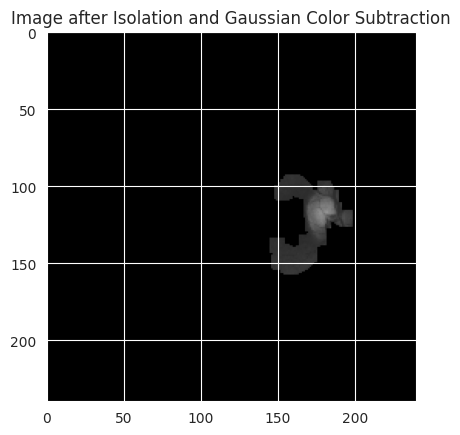

1/1 [==============================] - 0s 31ms/step
Image: im0245.ppm
Actual class: Normal
Predicted class: Normal
-------------------------------


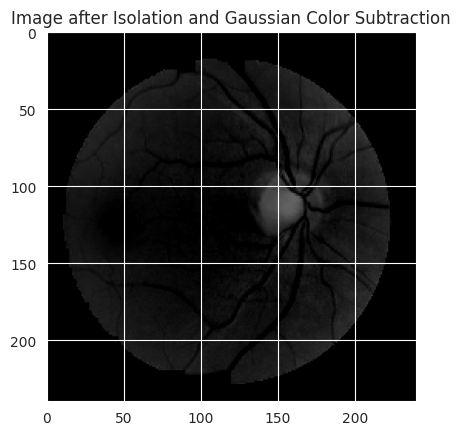

1/1 [==============================] - 0s 29ms/step
Image: istockphoto-172711954-612x612.jpg
Actual class: Normal
Predicted class: Papilledema
-------------------------------


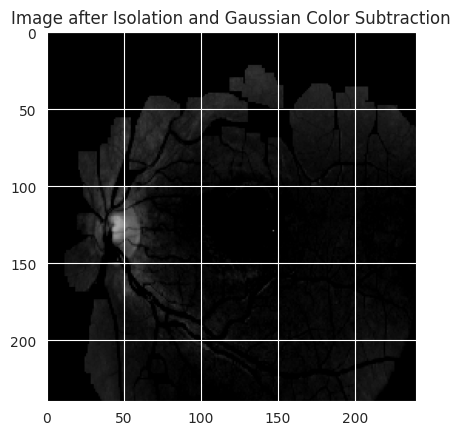

1/1 [==============================] - 0s 31ms/step
Image: normal-fundus.png
Actual class: Normal
Predicted class: Papilledema
-------------------------------


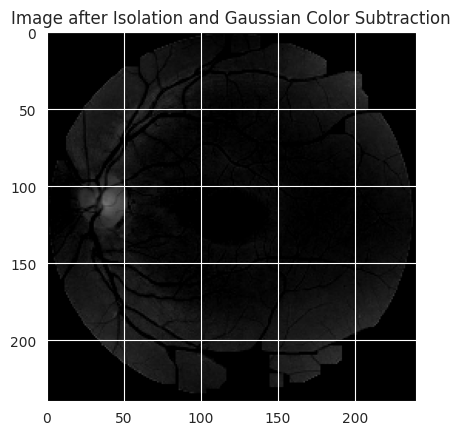

1/1 [==============================] - 0s 29ms/step
Image: 500px-Fundus_photograph_of_normal_left_eye.jpg
Actual class: Normal
Predicted class: Papilledema
-------------------------------


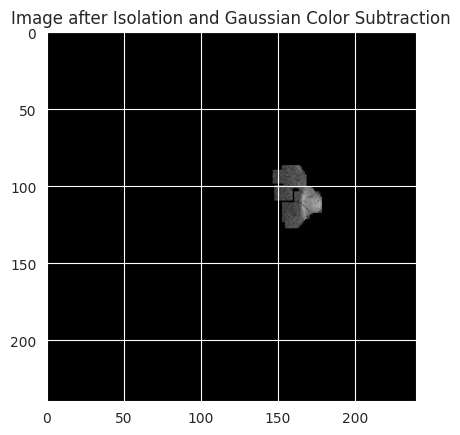

1/1 [==============================] - 0s 30ms/step
Image: Normal-fundus-LRG.jpg
Actual class: Normal
Predicted class: Papilledema
-------------------------------


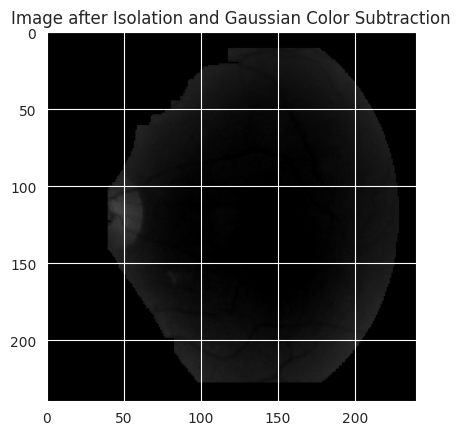

1/1 [==============================] - 0s 30ms/step
Image: im0244.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


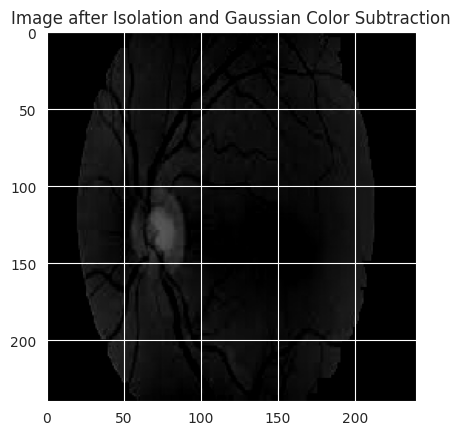

1/1 [==============================] - 0s 30ms/step
Image: images.jpeg
Actual class: Normal
Predicted class: Papilledema
-------------------------------


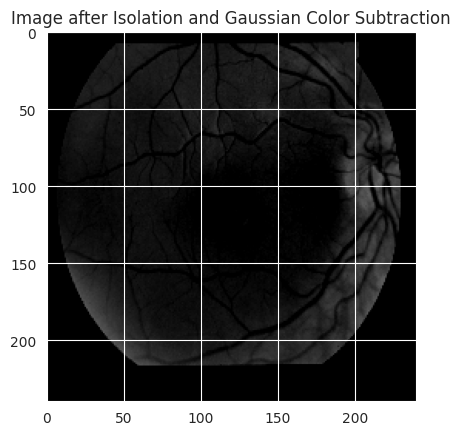

1/1 [==============================] - 0s 31ms/step
Image: im0234.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


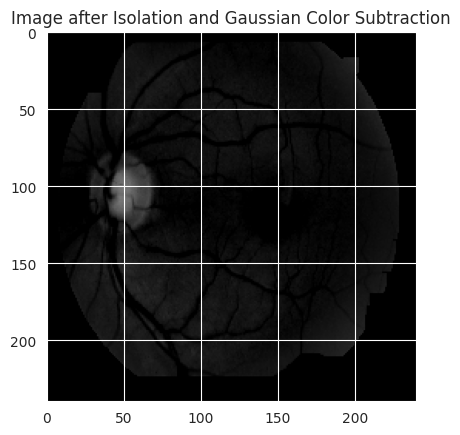

1/1 [==============================] - 0s 30ms/step
Image: im0235.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


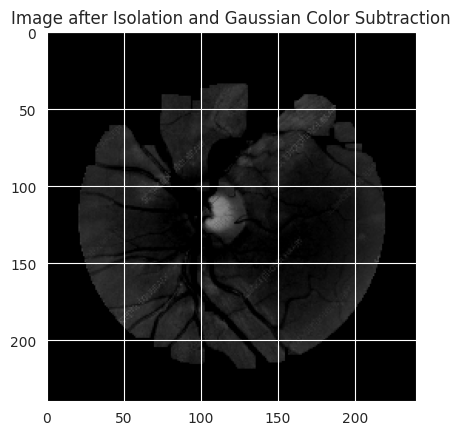

1/1 [==============================] - 0s 39ms/step
Image: 800wm.jpeg
Actual class: Normal
Predicted class: Papilledema
-------------------------------


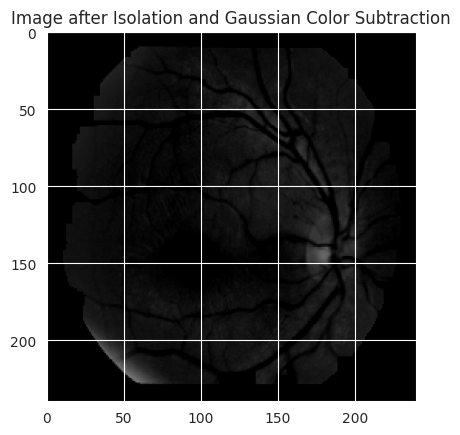

1/1 [==============================] - 0s 33ms/step
Image: im0237.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


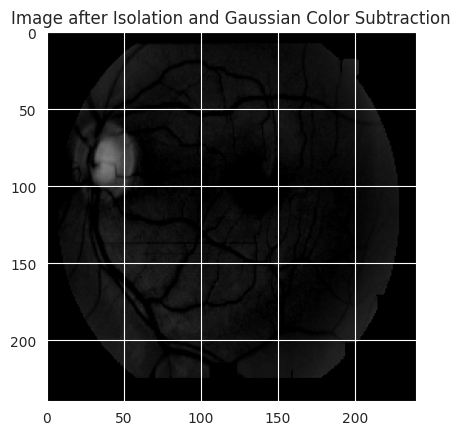

1/1 [==============================] - 0s 35ms/step
Image: im0236.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


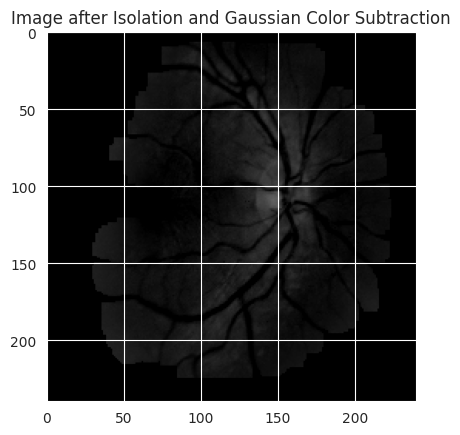

1/1 [==============================] - 0s 31ms/step
Image: im0238.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


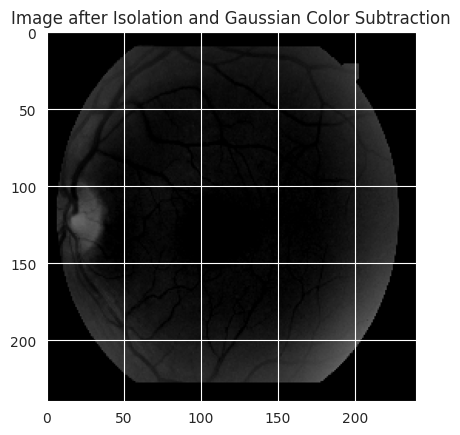

1/1 [==============================] - 0s 29ms/step
Image: im0239.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


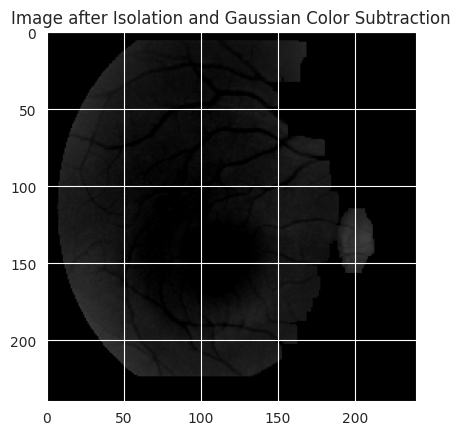

1/1 [==============================] - 0s 31ms/step
Image: im0240.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


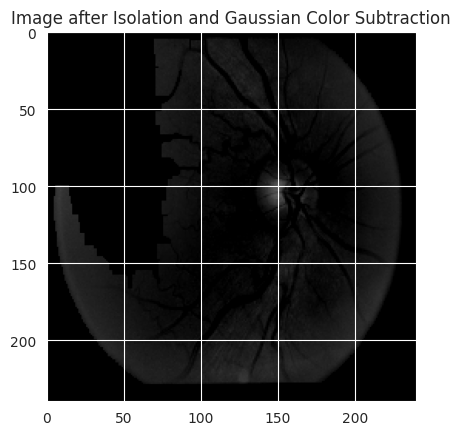

1/1 [==============================] - 0s 32ms/step
Image: im0241.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


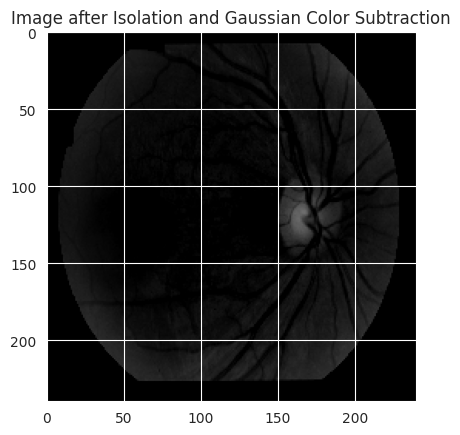

1/1 [==============================] - 0s 30ms/step
Image: im0243.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


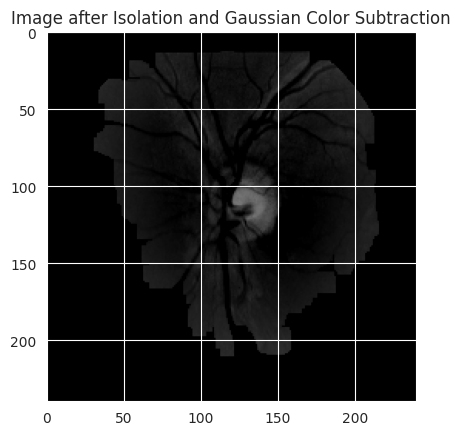

1/1 [==============================] - 0s 29ms/step
Image: im0242.ppm
Actual class: Normal
Predicted class: Papilledema
-------------------------------


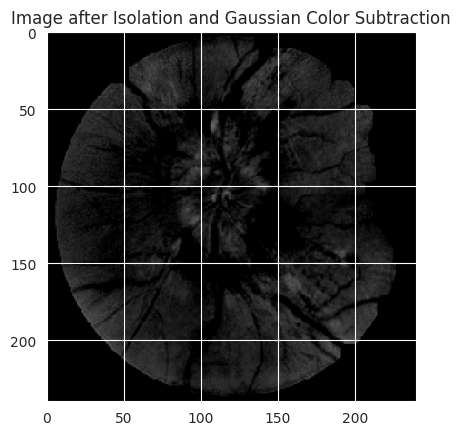

1/1 [==============================] - 0s 36ms/step
Image: Papilledema.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------


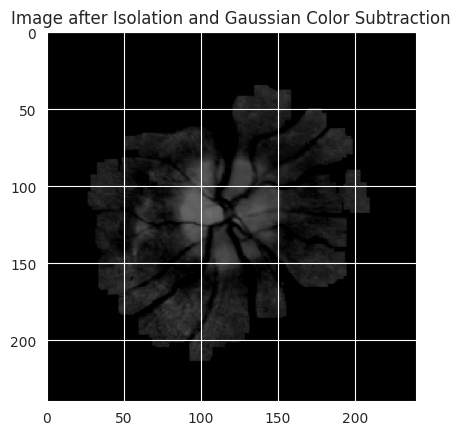

1/1 [==============================] - 0s 30ms/step
Image: papilledema..jpg.png
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------


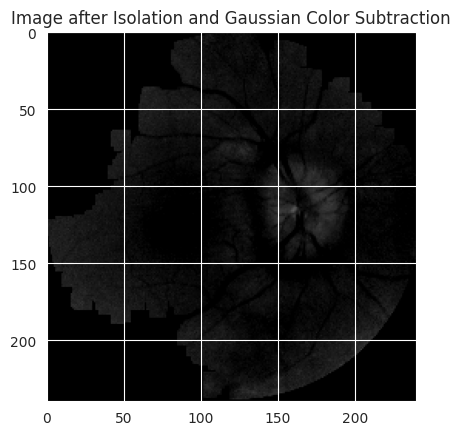

1/1 [==============================] - 0s 31ms/step
Image: papilledema-2.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------


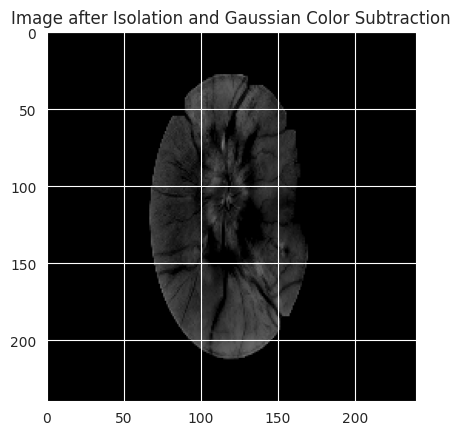

1/1 [==============================] - 0s 30ms/step
Image: original.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------


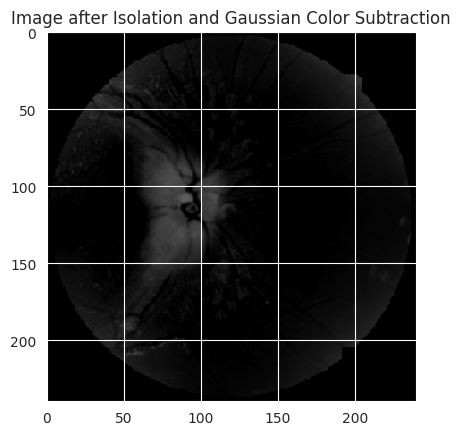

1/1 [==============================] - 0s 31ms/step
Image: Papilledema-of-the-right-eye.png
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------


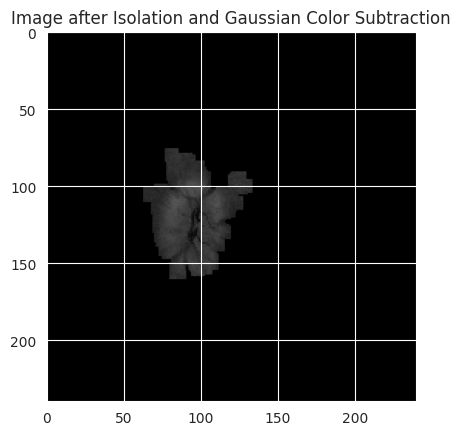

1/1 [==============================] - 0s 30ms/step
Image: 800px-Severe_papilledema.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------


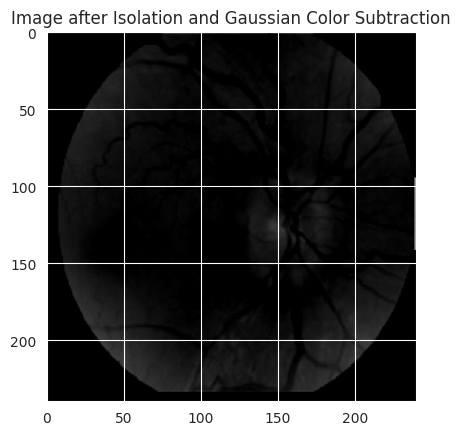

1/1 [==============================] - 0s 30ms/step
Image: eyejj16-cullen-figure-1.png
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------


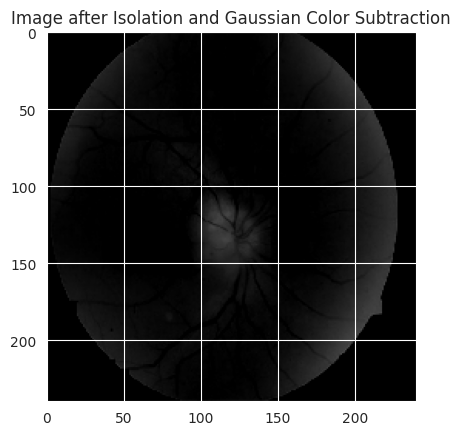

1/1 [==============================] - 0s 31ms/step
Image: CSpicsDiscedema.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------


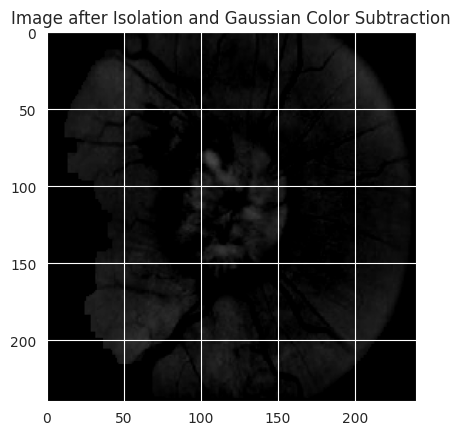

1/1 [==============================] - 0s 30ms/step
Image: Papilledema_high.jpg
Actual class: Papilledema
Predicted class: Papilledema
-------------------------------
0.37037037037037035


In [ ]:
# Define the test folder and the class list
test_folder = "/content/drive/MyDrive/Test_Images_New"
classes = ['Normal', 'Papilledema', 'Pseudopapilledema']

# Call the function and print the accuracy
print(evaluate_model(model, test_folder, classes))


In [ ]:
print("Number of output nodes: ", model.output.shape[-1])


Number of output nodes:  3


This short code simply ensures that we have the expected number of classes in our model (three).

#Conclusion

In conclusion, this detailed report provides a comprehensive explanation of the image classification model used to diagnose Papilledema, an indicator of Intracranial Hypertension (IH).
From data pre-processing and augmentation techniques to model architecture, training, and evaluation, every element has been addressed. 
This includes the selection and tuning of parameters, the purpose and operation of each function, and the means to interpret the results. 
We hope that EyeVu's software team will find this report useful in understanding and integrating this code into the existing pipeline, 
reproducing the results, and modifying it as needed to meet EyeVu's evolving requirements. 
With this knowledge, the team will be equipped to utilize the model effectively for the remote diagnosis of Papilledema. 


#References

**Datasets**

1. The initial dataset was sourced from: Kim, U. (2018, August 1). Machine learning for Pseudopapilledema. https://doi.org/10.17605/OSF.IO/2W5CE

2. The second dataset was sourced from: The William F. Hoyt Neuro-Ophthalmology Collection. https://novel.utah.edu/Hoyt/collection.php

**Machine Learning Model Framework**

1. https://www.kaggle.com/code/gpiosenka/papilledema-f1-score-98.

2. https://www.kaggle.com/code/jiaowoguanren/pseudo-papilledema-classification-tf-acc-0-99

These link to the Kaggle code sections, where the authors have implemented their ML models for papilledema detection using dataset 1.

The first link was very useful to the team, and the code was used as the foundation for the ML model that we have developed here. Once we familiarised ourselves with the methods used, we were then able to implement the wide variety of additional features that can be seen in this documentation, as well as the work involving image compression and optical filtering.